# Intro - Why a sports project?

Sports provide exciting opportunities for machine learning. Some maybe intuitive reasons are:

- In sports, there are rules, and we know all of them. Also, some people have viewed many years of certain sports. This allows us to have strong intuition as to what stats might make good predictive variables before ever collecting data or making a model. 

- Sports offers both fast feedback via viewership each season, and clear marks of success since the objective of sports is always winning or beating an opponent.

- Sports data is not just big data, but also data which is often accurate and subject to rigorous quality control because players are paid and win awards due to thier season stats.  

- Lastly, sports data is readily available with many websites and API's across a variety of sports.


## Why A Project on NBA Data?

I chose to focus on basketball primarily because the NBA is arguably the most data rich source out of the major American professional sports leagues, providing an easier problem to tackle compared to other sports. 

Basketball has existed for more than a hundred years, and as the game evolved with new rules and regulations, and so have the players. The NBA has now come to a time where Point Guards grab 10 plus rebounds and some Centers shoot effectively from the 3 point line, where 7 footers are skilled at being the primary ball handler. Players now aim to assert their dominance all over the court. Therefore players should no longer be defined by soley which position they play. In todays era playstyle archetypes may be more sufficient, which is evidenced in videos such as NBA 2K. Although it may be even better to assign a primary and secondary archetype, the aim of this project will be to identify the some of the existing primary playstyles amongst modern NBA players. This project in other words aims to provide a new way to group players into certain clusters using Unsupervised Machine Learning methods.

<br>


### **The project at this point is laid out as followed**:

## The Data

All Data used is sourced from NBA.com and consists of various recorded in-game player statistics from the 2019–2020 NBA Season. A total of 487 data points (players) were collected with around 80 features(stats), which includes Player Data, General Statistics, Advanced Statistics, Defensive Statistics, Play Style Statistics, and Passing Statistics. 

## Dimension Reduction - Principal Component Analysis

The curse of dimensionality not only makes a model harder to interpret, but can also lead to overfitting. It is reasonable to assume that not all of the features we collected will give valuable or pertinent information for our model. Some will no doubt give similar information given by another feature (think 3ptPct and Corner 3ptPct). Dimension Reduction is an important step in many Data Science projects.

Principal Component Analysis is a popular dimension reduction method. PCA aims to retain all information without throwing away any features. We perform slight Feature Selection already when picking features that may be more relavent/reduce redundancy. Here PCA was conducted using the Sci-Kit Learn library. 

## Hopkins Test

You may ask, how do we know we can even do clustering on this data set? 

Prior to clustering the data, we will use the Hopkins test. We use this test to verify spatial randomness of the data. This is done to ensure whether our data does in fact show Clustering tendencies (randomly generated data points have no clustering tendencies).


## K Means ++ Clustering

K-means is a centroid-based clustering algorithm, where we calculate the distance between each data point and a centroid to assign it to a cluster. The goal is to identify the K number of groups in the dataset. We will be analyzing WCSS Score and utilize the Elbow Method to determine the optimal number of clusters for our data. This will essentially group our NBA Players into distinct similar groups based on thier principle components (similarities in the data). The clusters can then be used to further analyze which playstyles may be more conducive to winning, player awards, overall greatness, etc.


Enough chat, lets get to the code!


# Import Libraries

In [1]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import pickle

In [2]:
pd.set_option("display.max_columns", None)
os.chdir('/Users/jarrodmautz/NBA_Proj')

In [3]:
# Import Our Dataset

In [4]:
df = pd.read_csv(r"NBA_Player_Data_2019-20_Season.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)
df.set_index('Player')
df.shape

(458, 145)

In [5]:
df[df['Player'] == "LeBron James"]

,Player,Advanced ASTpercent,Advanced OREBpercent,Advanced DREBpercent,Advanced REBpercent,Advanced TSpercent,Advanced USGpercent,Advanced PACE,Advanced PIE,postupdefense Poss,postupdefense PPP,Postupoffense Poss,Postupoffense PPP,putbacksoffense Poss,putbacksoffense PPP,Scoring percentPTS2PT_MR,Scoring percentPTS3PT,Scoring percentPTSFBPs,Scoring percentPTSFT,Scoring percentPTSOffTO,Scoring percentPTSPITP,Scoring 2FGMpercentAST,Scoring 3FGMpercentAST,Scoring FGMpercentAST,spotupoffense Poss,spotupoffense PPP,touches Time_OfPoss,touches Avg_Sec_PerTouch,touches Avg_Drib_PerTouch,TransitionOffensive Poss,TransitionOffensive PPP,Player ID,Team ID,GP,MIN,DREB,STL,Defense STLpercent,BLK,Defense BLKpercent,OPP_PTS_OFF_TOV,OPP_PTS_2ND_CHANCE,OPP_PTS_FB,OPP_PTS_PAINT,Defense WinShares,Height (in),Weight (lbs),Player Postion,PickNRollMan percent Poss,PickNRollMan PPP,PickNRollMan FG PCT,PickNRollMan percent ScorePoss,PickNRollMan Poss,PickNRollMan FGM,PickNRollMan FGA,PickNRollHandler Poss,PickNRollHandler PPP,PickNRollHandler FG PCT,PickNRollHandler Poss.1,PickNRollHandler FGM,PickNRollHandler FGA,ISO PPP,ISO FG PCT,ISO percent ScorePoss,ISO Poss,ISO FGM,ISO FGA,Team Abbrev,AGE,CONTESTED_SHOTS,CONTESTED_SHOTS_2PT,CONTESTED_SHOTS_3PT,DEFLECTIONS,CHARGES_DRAWN,SCREEN_ASSISTS,SCREEN_AST_PTS,LOOSE_BALLS_RECOVERED,BOX_OUTS,Cutting PPP,Cutting FG PCT,Cutting Poss,Cutting FGM,Cutting FGA,Handoff percent Poss,Handoff PPP,Handoff FG PCT,Handoff Poss,Handoff PTS,Handoff FGM,Handoff FGA,Passing Passes Made,Passing Passes Rec,AST,Passing ASTPTS Created,Passing percent ASTtoPass,Defense UnderRim OPPFGM,Defense UnderRim OPPFGA,Defense UnderRim OPPFGPCT,Defense <5ft OPPFGPCT,Defense 5-9ft OPPFGPCT,Defense 10-14ft OPPFGPCT,Defense 15-19ft OPPFGPCT,Defense 20-24ft OPPFGPCT,Defense 25-29ft OPPFGPCT,Defense 30-34ft OPPFGPCT,Defense 35-39ft OPPFGPCT,Defense 40+ft OPPFGPCT,POINTS,Scoring Drive PTS,Scoring DriveFGPCT,Scoring CATCH_SHOOT_PTS,Scoring CatchShootFGPCT,Scoring PULL_UP_PTS,Scoring PullUpFGPCT,PAINT_TOUCH_PTS,Scoring ITPFGPCT,Scoring POST_TOUCH_PTS,Scoring PostFGPCT,Scoring ELBOW_TOUCH_PTS,Scoring ElbowFGPCT,EFF_FG_PCT,Scoring RA FGM,Scoring RA FGA,Scoring RA FGPCT,Scoring ITP(NonRA) FGM,Scoring ITP(NonRA) FGA,Scoring ITP(NonRA) FGPCT,Scoring MR FGM,Scoring MR FGA,Scoring MR FGPCT,Scoring LC3 FGM,Scoring LC3 FGA,Scoring LC3 FGPCT,Scoring RC3 FGM,Scoring RC3 FGA,Scoring RC3 FGPCT,Scoring ATB3 FGM,Scoring ATB3 FGA,Scoring ATB3 FGPCT,Scoring Backcourt 3FGM,Scoring Backcourt 3FGA,Scoring Backcourt3 FGPCT,Scoring Corner FGM,Scoring Corner FGA,Scoring Corner FGPCT
103,LeBron James,47.9,2.9,18.7,11.0,56.9,30.8,101.26,19.2,0.3,0.43,2.5,0.92,0.7,1.51,8.9,25.7,19.4,14.8,17.6,50.5,25.9,48.6,30.9,1.6,1.08,7.4,4.78,3.79,5.2,1.12,2544.0,1.610613e+09,67.0,34.6,6.9,1.2,19.1,0.5,10.6,12.2,8.1,11.6,32.1,15.4,81.0,250.0,Forward,0.8,1.077,41.7,0.385,0.2,0.1,0.2,0.273,0.987,46.2,7.0,2.6,5.6,0.9,39.3,40.0,4.5,1.4,3.7,LAL,35.0,4.09,2.25,1.84,1.93,0.15,0.46,1.04,1.16,1.57,1.404,74.5,0.9,0.5,0.7,3.7,0.719,33.3,1.0,0.7,0.3,0.8,62.1,74.8,10.2,25.5,16.4,1.6,2.4,64.6,58.3,40.3,41.4,39.4,40.0,31.7,40.9,33.3,0.0,25.3,8.1,54.9,3.3,38.0,590.0,33.0,2.3,68.3,1.8,55.7,1.0,61.4,55.0,5.7,8.3,68.7,0.7,1.9,36.2,1.0,3.0,34.3,0.1,0.2,54.5,0.1,0.3,41.2,2.0,5.9,34.3,0.0,0.0,0.0,0.2,0.4,46.4


In [6]:
df.head(10)

,Player,Advanced ASTpercent,Advanced OREBpercent,Advanced DREBpercent,Advanced REBpercent,Advanced TSpercent,Advanced USGpercent,Advanced PACE,Advanced PIE,postupdefense Poss,postupdefense PPP,Postupoffense Poss,Postupoffense PPP,putbacksoffense Poss,putbacksoffense PPP,Scoring percentPTS2PT_MR,Scoring percentPTS3PT,Scoring percentPTSFBPs,Scoring percentPTSFT,Scoring percentPTSOffTO,Scoring percentPTSPITP,Scoring 2FGMpercentAST,Scoring 3FGMpercentAST,Scoring FGMpercentAST,spotupoffense Poss,spotupoffense PPP,touches Time_OfPoss,touches Avg_Sec_PerTouch,touches Avg_Drib_PerTouch,TransitionOffensive Poss,TransitionOffensive PPP,Player ID,Team ID,GP,MIN,DREB,STL,Defense STLpercent,BLK,Defense BLKpercent,OPP_PTS_OFF_TOV,OPP_PTS_2ND_CHANCE,OPP_PTS_FB,OPP_PTS_PAINT,Defense WinShares,Height (in),Weight (lbs),Player Postion,PickNRollMan percent Poss,PickNRollMan PPP,PickNRollMan FG PCT,PickNRollMan percent ScorePoss,PickNRollMan Poss,PickNRollMan FGM,PickNRollMan FGA,PickNRollHandler Poss,PickNRollHandler PPP,PickNRollHandler FG PCT,PickNRollHandler Poss.1,PickNRollHandler FGM,PickNRollHandler FGA,ISO PPP,ISO FG PCT,ISO percent ScorePoss,ISO Poss,ISO FGM,ISO FGA,Team Abbrev,AGE,CONTESTED_SHOTS,CONTESTED_SHOTS_2PT,CONTESTED_SHOTS_3PT,DEFLECTIONS,CHARGES_DRAWN,SCREEN_ASSISTS,SCREEN_AST_PTS,LOOSE_BALLS_RECOVERED,BOX_OUTS,Cutting PPP,Cutting FG PCT,Cutting Poss,Cutting FGM,Cutting FGA,Handoff percent Poss,Handoff PPP,Handoff FG PCT,Handoff Poss,Handoff PTS,Handoff FGM,Handoff FGA,Passing Passes Made,Passing Passes Rec,AST,Passing ASTPTS Created,Passing percent ASTtoPass,Defense UnderRim OPPFGM,Defense UnderRim OPPFGA,Defense UnderRim OPPFGPCT,Defense <5ft OPPFGPCT,Defense 5-9ft OPPFGPCT,Defense 10-14ft OPPFGPCT,Defense 15-19ft OPPFGPCT,Defense 20-24ft OPPFGPCT,Defense 25-29ft OPPFGPCT,Defense 30-34ft OPPFGPCT,Defense 35-39ft OPPFGPCT,Defense 40+ft OPPFGPCT,POINTS,Scoring Drive PTS,Scoring DriveFGPCT,Scoring CATCH_SHOOT_PTS,Scoring CatchShootFGPCT,Scoring PULL_UP_PTS,Scoring PullUpFGPCT,PAINT_TOUCH_PTS,Scoring ITPFGPCT,Scoring POST_TOUCH_PTS,Scoring PostFGPCT,Scoring ELBOW_TOUCH_PTS,Scoring ElbowFGPCT,EFF_FG_PCT,Scoring RA FGM,Scoring RA FGA,Scoring RA FGPCT,Scoring ITP(NonRA) FGM,Scoring ITP(NonRA) FGA,Scoring ITP(NonRA) FGPCT,Scoring MR FGM,Scoring MR FGA,Scoring MR FGPCT,Scoring LC3 FGM,Scoring LC3 FGA,Scoring LC3 FGPCT,Scoring RC3 FGM,Scoring RC3 FGA,Scoring RC3 FGPCT,Scoring ATB3 FGM,Scoring ATB3 FGA,Scoring ATB3 FGPCT,Scoring Backcourt 3FGM,Scoring Backcourt 3FGA,Scoring Backcourt3 FGPCT,Scoring Corner FGM,Scoring Corner FGA,Scoring Corner FGPCT
0,Langston Galloway,8.8,1.8,6.5,4.1,58.3,14.5,100.78,7.4,0.2,1.14,0.0,0.00,0.2,0.50,7.3,58.8,16.1,11.4,14.2,22.5,73.3,100.0,88.4,3.3,1.20,0.9,1.94,1.25,1.6,1.32,204038.0,1.610613e+09,66.0,25.8,1.8,0.7,18.8,0.2,7.0,9.8,7.3,6.8,27.6,5.2,73.0,200.0,Guard,2.5,1.000,35.7,0.333,0.2,0.1,0.2,0.078,0.766,40.0,0.7,0.2,0.6,0.000,0.0,0.0,0.0,0.0,0.0,DET,28.0,5.00,2.59,2.41,1.30,0.11,0.12,0.27,0.94,0.56,1.091,66.7,0.2,0.1,0.1,13.9,0.798,34.7,1.3,1.0,0.4,1.1,17.5,21.1,1.5,3.7,8.8,1.1,1.5,70.0,63.1,39.0,46.4,39.3,42.5,35.6,25.0,0.0,0.0,10.4,1.5,45.1,5.9,41.3,110.0,40.7,0.1,44.4,0.0,0.0,0.3,69.2,56.0,0.7,1.1,63.5,0.5,1.2,40.3,0.4,0.9,42.6,0.6,1.0,63.3,0.5,1.1,43.7,1.0,3.0,31.8,0.0,0.0,0.0,1.0,2.0,52.7
1,Anfernee Simons,10.2,1.6,8.4,5.0,51.7,18.1,103.10,6.1,0.4,0.82,0.0,0.00,0.0,0.00,15.5,38.2,11.8,12.7,13.5,33.5,35.0,68.8,46.5,2.4,0.89,2.1,3.80,3.25,1.4,0.93,1629014.0,1.610613e+09,70.0,20.7,1.8,0.4,16.0,0.1,5.9,6.9,6.6,6.3,20.6,3.3,75.0,181.0,Guard,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.311,0.884,40.4,2.8,1.0,2.4,1.000,38.5,42.7,1.1,0.4,0.9,POR,21.0,5.14,2.64,2.50,0.54,0.01,0.13,0.31,0.59,0.20,1.500,81.3,0.3,0.2,0.2,6.0,0.737,35.3,0.5,0.4,0.2,0.5,20.3,22.1,1.4,3.7,6.8,1.2,1.8,65.9,57.1,38.6,45.3,40.8,40.9,36.8,21.4,0.0,0.0,8.3,2.6,40.6,2.1,33.8,250.0,34.4,0.4,76.5,0.0,0.0,0.1,33.3,46.9,1.0,1.8,55.6,0.3,1.1,30.8,0.6,1.5,42.1,0.2,0.4,41.7,0.1,0.3,23.5,0.9,2.6,33.5,0.0,0.0,0.0,0.2,0.6,34.1
2,Bobby Portis,11.9,5.9,18

In [7]:
df.columns

Index(['Player', 'Advanced ASTpercent', 'Advanced OREBpercent',
       'Advanced DREBpercent', 'Advanced REBpercent', 'Advanced TSpercent',
       'Advanced USGpercent', 'Advanced PACE', 'Advanced PIE',
       'postupdefense Poss',
       ...
       'Scoring RC3 FGPCT', 'Scoring ATB3 FGM', 'Scoring ATB3 FGA',
       'Scoring ATB3 FGPCT', 'Scoring Backcourt 3FGM',
       'Scoring Backcourt 3FGA', 'Scoring Backcourt3 FGPCT',
       'Scoring Corner FGM', 'Scoring Corner FGA', 'Scoring Corner FGPCT'],
      dtype='object', length=145)

## Pre-processing DataFrame columns

### Drop Players who played less than 12 mins and 12 games

In [8]:
#Drop Players who play less than 12 mins/game and 12 games
data = df[(df['MIN'] >= 12) & (df['GP'] >= 12)]
#data.to_csv("test_read_data.csv")

In [9]:
data[data['Player'] == "LeBron James"]

,Player,Advanced ASTpercent,Advanced OREBpercent,Advanced DREBpercent,Advanced REBpercent,Advanced TSpercent,Advanced USGpercent,Advanced PACE,Advanced PIE,postupdefense Poss,postupdefense PPP,Postupoffense Poss,Postupoffense PPP,putbacksoffense Poss,putbacksoffense PPP,Scoring percentPTS2PT_MR,Scoring percentPTS3PT,Scoring percentPTSFBPs,Scoring percentPTSFT,Scoring percentPTSOffTO,Scoring percentPTSPITP,Scoring 2FGMpercentAST,Scoring 3FGMpercentAST,Scoring FGMpercentAST,spotupoffense Poss,spotupoffense PPP,touches Time_OfPoss,touches Avg_Sec_PerTouch,touches Avg_Drib_PerTouch,TransitionOffensive Poss,TransitionOffensive PPP,Player ID,Team ID,GP,MIN,DREB,STL,Defense STLpercent,BLK,Defense BLKpercent,OPP_PTS_OFF_TOV,OPP_PTS_2ND_CHANCE,OPP_PTS_FB,OPP_PTS_PAINT,Defense WinShares,Height (in),Weight (lbs),Player Postion,PickNRollMan percent Poss,PickNRollMan PPP,PickNRollMan FG PCT,PickNRollMan percent ScorePoss,PickNRollMan Poss,PickNRollMan FGM,PickNRollMan FGA,PickNRollHandler Poss,PickNRollHandler PPP,PickNRollHandler FG PCT,PickNRollHandler Poss.1,PickNRollHandler FGM,PickNRollHandler FGA,ISO PPP,ISO FG PCT,ISO percent ScorePoss,ISO Poss,ISO FGM,ISO FGA,Team Abbrev,AGE,CONTESTED_SHOTS,CONTESTED_SHOTS_2PT,CONTESTED_SHOTS_3PT,DEFLECTIONS,CHARGES_DRAWN,SCREEN_ASSISTS,SCREEN_AST_PTS,LOOSE_BALLS_RECOVERED,BOX_OUTS,Cutting PPP,Cutting FG PCT,Cutting Poss,Cutting FGM,Cutting FGA,Handoff percent Poss,Handoff PPP,Handoff FG PCT,Handoff Poss,Handoff PTS,Handoff FGM,Handoff FGA,Passing Passes Made,Passing Passes Rec,AST,Passing ASTPTS Created,Passing percent ASTtoPass,Defense UnderRim OPPFGM,Defense UnderRim OPPFGA,Defense UnderRim OPPFGPCT,Defense <5ft OPPFGPCT,Defense 5-9ft OPPFGPCT,Defense 10-14ft OPPFGPCT,Defense 15-19ft OPPFGPCT,Defense 20-24ft OPPFGPCT,Defense 25-29ft OPPFGPCT,Defense 30-34ft OPPFGPCT,Defense 35-39ft OPPFGPCT,Defense 40+ft OPPFGPCT,POINTS,Scoring Drive PTS,Scoring DriveFGPCT,Scoring CATCH_SHOOT_PTS,Scoring CatchShootFGPCT,Scoring PULL_UP_PTS,Scoring PullUpFGPCT,PAINT_TOUCH_PTS,Scoring ITPFGPCT,Scoring POST_TOUCH_PTS,Scoring PostFGPCT,Scoring ELBOW_TOUCH_PTS,Scoring ElbowFGPCT,EFF_FG_PCT,Scoring RA FGM,Scoring RA FGA,Scoring RA FGPCT,Scoring ITP(NonRA) FGM,Scoring ITP(NonRA) FGA,Scoring ITP(NonRA) FGPCT,Scoring MR FGM,Scoring MR FGA,Scoring MR FGPCT,Scoring LC3 FGM,Scoring LC3 FGA,Scoring LC3 FGPCT,Scoring RC3 FGM,Scoring RC3 FGA,Scoring RC3 FGPCT,Scoring ATB3 FGM,Scoring ATB3 FGA,Scoring ATB3 FGPCT,Scoring Backcourt 3FGM,Scoring Backcourt 3FGA,Scoring Backcourt3 FGPCT,Scoring Corner FGM,Scoring Corner FGA,Scoring Corner FGPCT
103,LeBron James,47.9,2.9,18.7,11.0,56.9,30.8,101.26,19.2,0.3,0.43,2.5,0.92,0.7,1.51,8.9,25.7,19.4,14.8,17.6,50.5,25.9,48.6,30.9,1.6,1.08,7.4,4.78,3.79,5.2,1.12,2544.0,1.610613e+09,67.0,34.6,6.9,1.2,19.1,0.5,10.6,12.2,8.1,11.6,32.1,15.4,81.0,250.0,Forward,0.8,1.077,41.7,0.385,0.2,0.1,0.2,0.273,0.987,46.2,7.0,2.6,5.6,0.9,39.3,40.0,4.5,1.4,3.7,LAL,35.0,4.09,2.25,1.84,1.93,0.15,0.46,1.04,1.16,1.57,1.404,74.5,0.9,0.5,0.7,3.7,0.719,33.3,1.0,0.7,0.3,0.8,62.1,74.8,10.2,25.5,16.4,1.6,2.4,64.6,58.3,40.3,41.4,39.4,40.0,31.7,40.9,33.3,0.0,25.3,8.1,54.9,3.3,38.0,590.0,33.0,2.3,68.3,1.8,55.7,1.0,61.4,55.0,5.7,8.3,68.7,0.7,1.9,36.2,1.0,3.0,34.3,0.1,0.2,54.5,0.1,0.3,41.2,2.0,5.9,34.3,0.0,0.0,0.0,0.2,0.4,46.4


In [10]:
for_later_df = pd.DataFrame()
for_later_df["teamAbbrv"] = data['Team Abbrev']
for_later_df["players"] = data['Player']
for_later_df['position'] = data['Player Postion']
for_later_df['Age'] = data['AGE']
#for_later_df.to_csv("test_read_data.csv")
for_later_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 446
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   teamAbbrv  370 non-null    object 
 1   players    370 non-null    object 
 2   position   370 non-null    object 
 3   Age        370 non-null    float64
dtypes: float64(1), object(3)
memory usage: 14.5+ KB


In [11]:
for_later_df[for_later_df['players'] == "LeBron James"]

,teamAbbrv,players,position,Age
103,LAL,LeBron James,Forward,35.0


### Save some info for our last output CSV df

In [12]:
print(data.columns.tolist())

['Player', 'Advanced ASTpercent', 'Advanced OREBpercent', 'Advanced DREBpercent', 'Advanced REBpercent', 'Advanced TSpercent', 'Advanced USGpercent', 'Advanced PACE', 'Advanced PIE', 'postupdefense Poss', 'postupdefense PPP', 'Postupoffense Poss', 'Postupoffense PPP', 'putbacksoffense Poss', 'putbacksoffense PPP', 'Scoring percentPTS2PT_MR', 'Scoring percentPTS3PT', 'Scoring percentPTSFBPs', 'Scoring percentPTSFT', 'Scoring percentPTSOffTO', 'Scoring percentPTSPITP', 'Scoring 2FGMpercentAST', 'Scoring 3FGMpercentAST', 'Scoring FGMpercentAST', 'spotupoffense Poss', 'spotupoffense PPP', 'touches Time_OfPoss', 'touches Avg_Sec_PerTouch', 'touches Avg_Drib_PerTouch', 'TransitionOffensive Poss', 'TransitionOffensive PPP', 'Player ID', 'Team ID', 'GP', 'MIN', 'DREB', 'STL', 'Defense STLpercent', 'BLK', 'Defense BLKpercent', 'OPP_PTS_OFF_TOV', 'OPP_PTS_2ND_CHANCE', 'OPP_PTS_FB', 'OPP_PTS_PAINT', 'Defense WinShares', 'Height (in)', 'Weight (lbs)', 'Player Postion', 'PickNRollMan percent Poss '

### Get rid of categorical and other features 

In [13]:
frame = data.drop(['Player ID', "Team ID", "Team Abbrev", 'Advanced PACE', 'GP', 'MIN', 
                     'Handoff percent Poss', 'Handoff FGM', 'Handoff FGA',  'ISO percent ScorePoss',
       'Height (in)', 'Weight (lbs)', 'Player Postion', 'Advanced ASTpercent', 'Scoring percentPTS3PT',
        'Scoring MR FGPCT', 'Scoring LC3 FGM', 'PickNRollMan percent ScorePoss', 'PickNRollHandler Poss.1',
        'Scoring LC3 FGA', 'Scoring LC3 FGPCT', 'Scoring RC3 FGM', 'Scoring RC3 FGA', 'Scoring RC3 FGPCT',
        'Scoring ATB3 FGM', 'Scoring ATB3 FGA', 'Scoring ATB3 FGPCT', 'Scoring Backcourt 3FGM', 'AGE',
        'Scoring Backcourt 3FGA', 'Scoring Backcourt3 FGPCT', 'Defense UnderRim OPPFGM', 'Defense UnderRim OPPFGA'], axis=1)

In [14]:
#frame.to_csv("test_read_data.csv")
frame.set_index("Player", inplace=True)
display(frame.shape)
print()
display(frame.info())
print()
display(frame)

(370, 111)


<class 'pandas.core.frame.DataFrame'>
Index: 370 entries, Langston Galloway to Juan Toscano-Anderson
Columns: 111 entries, Advanced OREBpercent to Scoring Corner FGPCT
dtypes: float64(111)
memory usage: 323.8+ KB


None

,Advanced OREBpercent,Advanced DREBpercent,Advanced REBpercent,Advanced TSpercent,Advanced USGpercent,Advanced PIE,postupdefense Poss,postupdefense PPP,Postupoffense Poss,Postupoffense PPP,putbacksoffense Poss,putbacksoffense PPP,Scoring percentPTS2PT_MR,Scoring percentPTSFBPs,Scoring percentPTSFT,Scoring percentPTSOffTO,Scoring percentPTSPITP,Scoring 2FGMpercentAST,Scoring 3FGMpercentAST,Scoring FGMpercentAST,spotupoffense Poss,spotupoffense PPP,touches Time_OfPoss,touches Avg_Sec_PerTouch,touches Avg_Drib_PerTouch,TransitionOffensive Poss,TransitionOffensive PPP,DREB,STL,Defense STLpercent,BLK,Defense BLKpercent,OPP_PTS_OFF_TOV,OPP_PTS_2ND_CHANCE,OPP_PTS_FB,OPP_PTS_PAINT,Defense WinShares,PickNRollMan percent Poss,PickNRollMan PPP,PickNRollMan FG PCT,PickNRollMan Poss,PickNRollMan FGM,PickNRollMan FGA,PickNRollHandler Poss,PickNRollHandler PPP,PickNRollHandler FG PCT,PickNRollHandler FGM,PickNRollHandler FGA,ISO PPP,ISO FG PCT,ISO Poss,ISO FGM,ISO FGA,CONTESTED_SHOTS,CONTESTED_SHOTS_2PT,CONTESTED_SHOTS_3PT,DEFLECTIONS,CHARGES_DRAWN,SCREEN_ASSISTS,SCREEN_AST_PTS,LOOSE_BALLS_RECOVERED,BOX_OUTS,Cutting PPP,Cutting FG PCT,Cutting Poss,Cutting FGM,Cutting FGA,Handoff PPP,Handoff FG PCT,Handoff Poss,Handoff PTS,Passing Passes Made,Passing Passes Rec,AST,Passing ASTPTS Created,Passing percent ASTtoPass,Defense UnderRim OPPFGPCT,Defense <5ft OPPFGPCT,Defense 5-9ft OPPFGPCT,Defense 10-14ft OPPFGPCT,Defense 15-19ft OPPFGPCT,Defense 20-24ft OPPFGPCT,Defense 25-29ft OPPFGPCT,Defense 30-34ft OPPFGPCT,Defense 35-39ft OPPFGPCT,Defense 40+ft OPPFGPCT,POINTS,Scoring Drive PTS,Scoring DriveFGPCT,Scoring CATCH_SHOOT_PTS,Scoring CatchShootFGPCT,Scoring PULL_UP_PTS,Scoring PullUpFGPCT,PAINT_TOUCH_PTS,Scoring ITPFGPCT,Scoring POST_TOUCH_PTS,Scoring PostFGPCT,Scoring ELBOW_TOUCH_PTS,Scoring ElbowFGPCT,EFF_FG_PCT,Scoring RA FGM,Scoring RA FGA,Scoring RA FGPCT,Scoring ITP(NonRA) FGM,Scoring ITP(NonRA) FGA,Scoring ITP(NonRA) FGPCT,Scoring MR FGM,Scoring MR FGA,Scoring Corner FGM,Scoring Corner FGA,Scoring Corner FGPCT
Player,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Langston Galloway,1.8,6.5,4.1,58.3,14.5,7.4,0.2,1.14,0.0,0.00,0.2,0.50,7.3,16.1,11.4,14.2,22.5,73.3,100.0,88.4,3.3,1.20,0.9,1.94,1.25,1.6,1.32,1.8,0.7,18.8,0.2,7.0,9.8,7.3,6.8,27.6,5.2,2.5,1.000,35.7,0.2,0.1,0.2,0.078,0.766,40.0,0.2,0.6,0.000,0.0,0.0,0.0,0.0,5.00,2.59,2.41,1.30,0.11,0.12,0.27,0.94,0.56,1.091,66.7,0.2,0.1,0.1,0.798,34.7,1.3,1.0,17.5,21.1,1.5,3.7,8.8,70.0,63.1,39.0,46.4,39.3,42.5,35.6,25.0,0.0,0.0,10.4,1.5,45.1,5.9,41.3,110.0,40.7,0.1,44.4,0.0,0.0,0.3,69.2,56.0,0.7,1.1,63.5,0.5,1.2,40.3,0.4,0.9,1.0,2.0,52.7
Anfernee Simons,1.6,8.4,5.0,51.7,18.1,6.1,0.4,0.82,0.0,0.00,0.0,0.00,15.5,11.8,12.7,13.5,33.5,35.0,68.8,46.5,2.4,0.89,2.1,3.80,3.25,1.4,0.93,1.8,0.4,16.0,0.1,5.9,6.9,6.6,6.3,20.6,3.3,0.0,0.000,0.0,0.0,0.0,0.0,0.311,0.884,40.4,1.0,2.4,1.000,38.5,1.1,0.4,0.9,5.14,2.64,2.50,0.54,0.01,0.13,0.31,0.59,0.20,1.500,81.3,0.3,0.2,0.2,0.737,35.3,0.5,0.4,20.3,22.1,1.4,3.7,6.8,65.9,57.1,38.6,45.3,40.8,40.9,36.8,21.4,0.0,0.0,8.3,2.6,40.6,2.1,33.8,250.0,34.4,0.4,76.5,0.0,0.0,0.1,33.3,46.9,1.0,1.8,55.6,0.3,1.1,30.8,0.6,1.5,0.2,0.6,34.1
Bobby Portis,5.9,18.1,11.8,51.3,20.2,10.3,0.7,0.89,2.1,0.81,1.1,0.90,13.1,6.0,10.8,14.6,44.3,52.3,98.2,64.7,2.7,0.99,1.1,1.68,0.69,1.0,1.29,3.9,0.5,15.4,0.3,13.8,7.6,5.7,4.9,19.2,5.4,15.8,0.991,44.6,1.7,0.7,1.5,0.000,0.000,0.0,0.0,0.0,0.800,40.0,0.5,0.2,0.5,5.94,3.50,2.44,0.79,0.02,1.41,3.14,0.52,4.11,1.031,58.3,0.5,0.2,0.4,0.000,0.0,0.0,0.0,29.3,23.2,1.5,3.7,5.1,65.2,61.8,35.5,43.5,45.0,39.6,37.6,23.5,0.0,0.0,10.1,1.5,54.1,3.8,36.4,130.0,43.6,2.0,47.7,1.7,47.5,0.8,63.6,50.7,1.4,2.3,60.0,0.9,1.8,47.9,0.8,2.0,0.2,0.6,41.0
Coby White,1.7,13.0,6.9,47.7,22.3,7.6,0.2,1.17,0.0,0.00,0.0,0.00,6.9,20.1,11.1,20.3,34.0,28.0,78.6,50.2,3.4,0.94,2.7,3.82,3.21,2.5,1.06,3.1,0.8,14.0,0.1,4.2,9.0,6.6,7.1,26.8,7.7,0.0,0.000,0.0,0.0,0.0,0.0,0.344,0.799,39.5,1.6,4.0,0.786,35.3,0.9,0.3,0.8,4.54,2.17,2.37,1.32,

<br>

##  Set our X Value

In [15]:
X = frame.values

<br>

# Standardizing NBA Data

In [16]:
X = StandardScaler().fit_transform(X)

<br>

# Perform Principal Component Analysis (PCA)

Next up, we need to perform some dimension reduction to improve analysis on this dataset. Dimension in this context refers to the number of player statistics we are using.  The method we are going to be using is Principal Component Analysis. While this isn’t a super simple concept, using nba stats as an example makes it a little easier to understand. The first thing to cover here is correlation within the dataset. Certain features within a dataset are going to have a certain amount of correlation to other features (think 3PM, 3PA, and 3P%). 

### Dimension Reduction For More Efficient Analysis

Performing a dimensionality reduction helps eliminate these correlations by reducing the number of features down and assigning representative numbers to those groupings. These groupings are referred to as principal components. Now we need to figure out how many components(dimensions) to reduce our data down to. Our dataset contains 111 features, so while normally we would only be concerned with less than 111 components, but for the sake of analysis we are going to analyze for 2-111 components so we can see the diminishing returns of using the whole dataset.


In [17]:
#empty list to store our variance from component to component
#so we can get our cumulative variance.
pca_list = []

In [18]:
for n in range(2, 112):
    pca = PCA(n_components = n)
    components = pca.fit_transform(X)
    pca_variance = sum(pca.explained_variance_ratio_)
    pca_list.append(pca_variance)
    print("For n_components = {}, explained variance ratio is {}".format(pca.n_components, pca_variance))

For n_components = 2, explained variance ratio is 0.45859620689862035
For n_components = 3, explained variance ratio is 0.5195944505477972
For n_components = 4, explained variance ratio is 0.5572824060936449
For n_components = 5, explained variance ratio is 0.5860204826401557
For n_components = 6, explained variance ratio is 0.6097678416575714
For n_components = 7, explained variance ratio is 0.6329867614654693
For n_components = 8, explained variance ratio is 0.6522344482877984
For n_components = 9, explained variance ratio is 0.6692793080608039
For n_components = 10, explained variance ratio is 0.6857204666521298
For n_components = 11, explained variance ratio is 0.701204509532737
For n_components = 12, explained variance ratio is 0.7157597902157329
For n_components = 13, explained variance ratio is 0.729013976787964
For n_components = 14, explained variance ratio is 0.741852741359798
For n_components = 15, explained variance ratio is 0.7539430178825253
For n_components = 16, explain

As we can see from that output, the explained variance goes up with each added component, which makes sense. However, as we get close to the full dataset, we can clearly see diminishing returns. 

## Define how many components we want to reduce our dataset to

It may be nice to visualize our previous output into a graph.

Text(0, 0.5, 'Explained Variance Ratio')

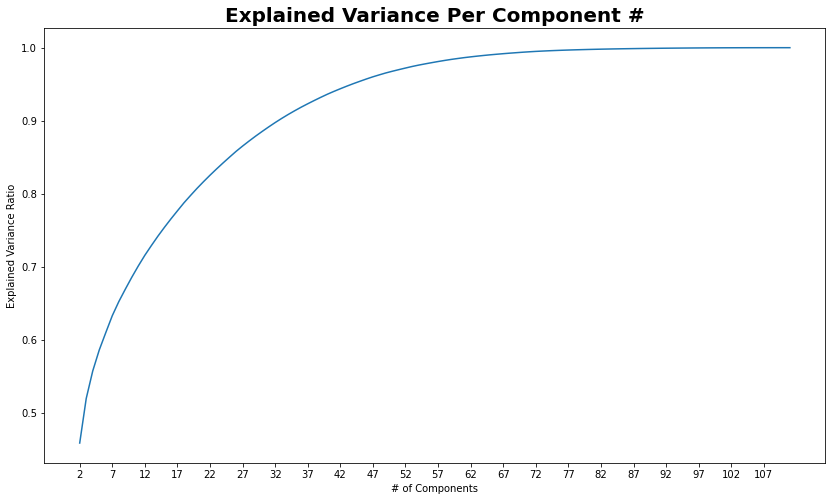

In [19]:
plt.figure(figsize=(14,8))
plt.title("Explained Variance Per Component #", weight = 'bold', size = 20)
plt.plot(range(2, pca.n_components_ + 1), pca_list)
plt.xticks(np.arange(2, pca.n_components_ + 1, 5.0))
plt.xlabel('# of Components')
plt.ylabel('Explained Variance Ratio')

Unfortunately, the graph doesn’t have a good cut elbow to identify the point of fastest increase visually. So we are going to go ahead and use 15 components going forward (~75% of total explained variance).  This is ultimately a subjective decision however.

<br>

In [20]:
Pca = PCA(n_components = 15)

#get the components by fitting on our X
components = Pca.fit_transform(X)
#get components names into list
pca_name = []
for i in range(1, Pca.n_components_ + 1):
    pca_name.append('PC ' + str(i))
print(pca_name)

['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10', 'PC 11', 'PC 12', 'PC 13', 'PC 14', 'PC 15']


# Display Principal Components

In [21]:
pca_df = pd.DataFrame(components, columns = pca_name)

#set index to our earlier list of players

index = []
for i in range(1, Pca.n_components_ + 1):
    index += ['PC ' + str(i)]
pca_df = pca_df[index]


#display first 5
display(pca_df.head())

#print(pca_df.info())

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15
0,-2.007707,-3.232789,5.539256,0.391044,1.072536,-0.210445,-0.830491,-0.016241,0.504305,0.004911,-0.142011,-1.306685,1.298510,-0.088158,-0.316691
1,-3.366921,-2.796708,-1.088375,1.187050,0.312893,-1.402378,0.707197,-0.086303,-0.301527,0.083611,-0.983913,0.500381,-1.847183,-1.439331,0.205505
2,3.631949,0.503035,0.374423,3.654580,-2.733515,-0.065150,0.439374,-0.066200,1.449816,-0.216571,-1.685262,0.203310,0.011969,-0.417636,0.328544
3,-5.769687,-1.175579,-0.305385,-0.001429,-1.253227,-0.567211,-0.806315,0.165100,-1.116198,-0.449602,0.826311,-1.021105,0.029347,-1.340043,0.587804
4,1.855256,-0.591315,5.307778,-2.276526,1.137548,0.607263,-1.371232,1.353326,-0.036077,-1.049500,-0.171374,0.498523,-1.171875,0.251347,-0.600938


<br>

# Does Our Data Have Clustering Tendencies? 
## [Hopkins test](https://pyclustertend.readthedocs.io/en/latest/?badge=latest)

You may ask, how do we know we can even do clustering on this data set? 

Prior to clustering the data, we will use the Hopkins test. We use this test to verify spatial randomness of the data. This is done to ensure whether our data does in fact show Clustering tendencies (randomly generated data points have no clustering tendencies).

If the test is positve (an hopkins score which tends to 0) it means that the data is not uniformly distributed. Hence clustering can be useful to classify the observations. However, if the score is too high (above 0.3 for exemple); the data is uniformly distributed and clustering can’t be really useful for the problem at hand.
 
Essentially we want our Hopkins statistic to be closer to 0 or 1 than to 0.5. This is because:

    0 <= H <= 1
    
    H = 0 or 1 : Data points are non randomly generated, and have strong clustering tendencies.
    H = 0.5 : Data points are generated randomly.



In [22]:
#!pip install pyclustertend
from pyclustertend import hopkins

# Conduct Hopkins Test
hopkins(pca_df, pca_df.shape[0])

0.294081003634189

By conducting a Hopkins test above, a p-value of 0.29 was observed. Therefore, there is evidence to conclude that the dataset has clustering tendencies.

<br>

## Check size of our components and grab a list of our feature names

In [23]:
print(Pca.components_.shape)
feat_list = frame.columns.to_list()

(15, 111)


In [24]:
# Utility function to pull the top 15 features with highest absolute eigenvalues for 1 PC
def sort_top_eigens(component, feat_cols):
    pca_eigen = pd.Series(component, index = feat_cols)
    sorted_pca_eigens = pca_eigen.abs().sort_values(ascending = False)
    top_15 = sorted_pca_eigens[0:15].index.values
    return pca_eigen[top_15]

# Interpreting Principal Components

Principal Components are interpreted by using their eigenvalues. A feature having high positive eigenvalues mean the component has a high positive association with the feature. 

A feature having high negative eigenvalues mean the feature has a high negative association with the component.

PC 1 explains a large % of the variance created by the data and will hence be important in clustering players. The following table below shows the top 15 features with highest absolute eigenvalues. 

We will come back to analyze these further a little later.

## PC 1

In [25]:
top15 = sort_top_eigens(Pca.components_[0], feat_list)
display(top15)

PickNRollHandler Poss        -0.159320
PickNRollMan percent Poss     0.159221
touches Avg_Drib_PerTouch    -0.153903
touches Avg_Sec_PerTouch     -0.150682
Advanced OREBpercent          0.149677
SCREEN_AST_PTS                0.148143
SCREEN_ASSISTS                0.147653
PickNRollHandler FGA         -0.146791
Defense BLKpercent            0.146408
Advanced REBpercent           0.144171
PickNRollMan FGM              0.144072
PickNRollHandler FGM         -0.143304
PickNRollMan Poss             0.142385
BOX_OUTS                      0.141934
PAINT_TOUCH_PTS               0.141903
dtype: float64

## The way to analyze the above table is as follows:

PC 1 seems to reward players who (positive marks):

- Are often a PickNRollMan 
- Have higher OREB percent
- Set good screens
- Get blocks often
- Score often as a PickNRollMan 
- Get a lot of rebounds
- Get a lot of points in the paint
- Box out often


PC 1 seems to penalize players who (negative marks):

- Are often PickNRollHandlers
- Take a lot of shots as PickNRollHandlers
- Who dribble a lot or for lot periods of time


High PC 1 values indicate that the player predominately plays close to the basket, is often a pick and roll man, sets good screens, and is a taller and or slower player less skilled with the ball in his hands. It’s safe to assume Centers or Forwards would have high PC 1 values.


<br>

# K Means ++ Clustering

K-means is a centroid-based clustering algorithm, where we calculate the distance between each data point and a centroid to assign it to a cluster. The goal is to identify the K number of groups in the dataset. 

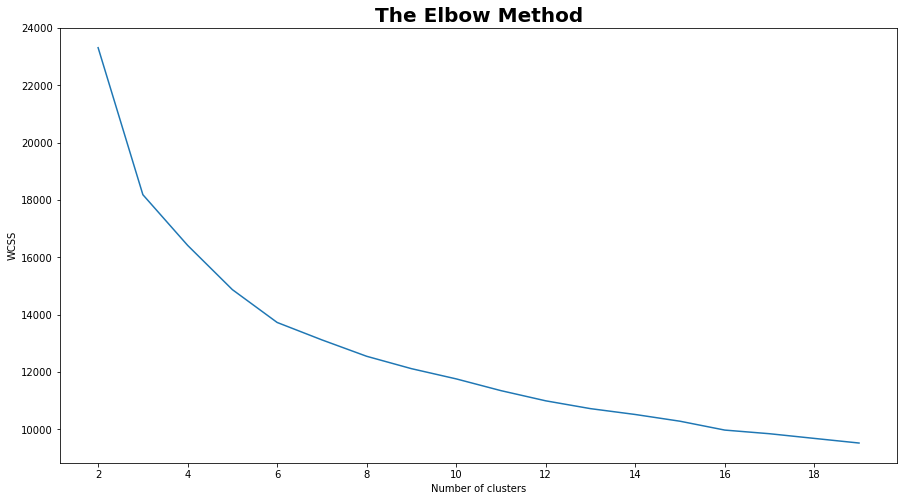

In [26]:
wcss = []
for i in range(2, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(15,8))
plt.plot(range(2, 20), wcss)
plt.title('The Elbow Method', weight = 'bold', size = 20)
plt.xlabel('Number of clusters')
plt.xticks(np.arange(2, 20, 2.0))
plt.ylabel('WCSS')
plt.show()

Alternatively we can use [YellowBricks machine learning visualization library](https://www.scikit-yb.org/en/latest/) for creating the Elbow method plot.

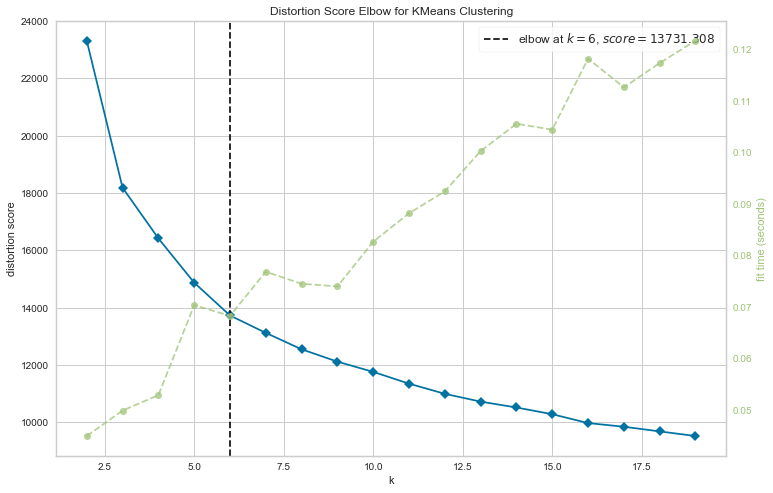

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

plt.figure(figsize=(12,8))
kmeans = KMeans(init = 'k-means++', random_state = 42)
visualizer = KElbowVisualizer(kmeans, k=(2,20))
 
visualizer.fit(pca_df)       # Fit the data to the visualizer
visualizer.show()   

There is definitely room for interpretation on how many clusters you use and your reasons for doing so.

Next we will want to assign our players their clusters in a dataframe, and export to excel so we can review.

In [28]:
kmeans = KMeans(n_clusters = 8, random_state = 42)

kmeans.fit(pca_df)

y_kmeans = kmeans.predict(pca_df)

with open('KmeansClusterModel.sav', 'wb') as file:
    pickle.dump(kmeans, file)

labels = kmeans.labels_
display(labels)

array([7, 2, 0, 5, 7, 7, 4, 2, 7, 7, 6, 5, 3, 1, 6, 0, 5, 1, 3, 7, 5, 2,
       5, 6, 1, 1, 5, 1, 5, 1, 5, 7, 5, 7, 0, 4, 0, 5, 7, 2, 5, 4, 0, 3,
       0, 7, 2, 7, 6, 6, 5, 1, 7, 2, 4, 6, 5, 7, 5, 1, 4, 5, 3, 5, 0, 7,
       7, 1, 5, 7, 7, 5, 0, 1, 7, 1, 5, 1, 3, 6, 0, 5, 4, 7, 1, 2, 7, 3,
       5, 4, 6, 7, 3, 4, 3, 4, 6, 1, 3, 7, 5, 5, 1, 6, 4, 0, 6, 6, 5, 7,
       0, 6, 2, 4, 5, 0, 6, 7, 7, 1, 3, 4, 4, 6, 4, 7, 1, 3, 5, 4, 0, 5,
       5, 7, 2, 6, 4, 0, 3, 2, 7, 4, 7, 0, 7, 6, 3, 6, 1, 7, 5, 2, 7, 6,
       6, 6, 5, 4, 1, 4, 0, 4, 1, 2, 5, 2, 6, 0, 5, 7, 3, 1, 5, 7, 6, 1,
       1, 1, 0, 0, 2, 5, 2, 4, 5, 1, 4, 4, 2, 4, 1, 2, 2, 5, 1, 2, 5, 0,
       0, 6, 5, 1, 6, 7, 2, 5, 0, 5, 0, 1, 7, 0, 3, 1, 2, 3, 5, 6, 2, 5,
       1, 5, 4, 6, 6, 0, 7, 6, 7, 2, 1, 5, 3, 6, 6, 2, 0, 5, 1, 2, 6, 2,
       4, 0, 6, 4, 5, 2, 5, 5, 5, 6, 7, 3, 5, 7, 2, 3, 6, 2, 6, 4, 7, 7,
       2, 6, 6, 4, 5, 6, 6, 3, 6, 3, 6, 1, 3, 5, 1, 2, 3, 6, 4, 0, 0, 5,
       4, 4, 4, 4, 2, 4, 6, 0, 4, 0, 2, 5, 6, 5, 6,

## Visualising the clusters

In [29]:
pca2 = PCA(2)

components = pca2.fit_transform(pca_df)

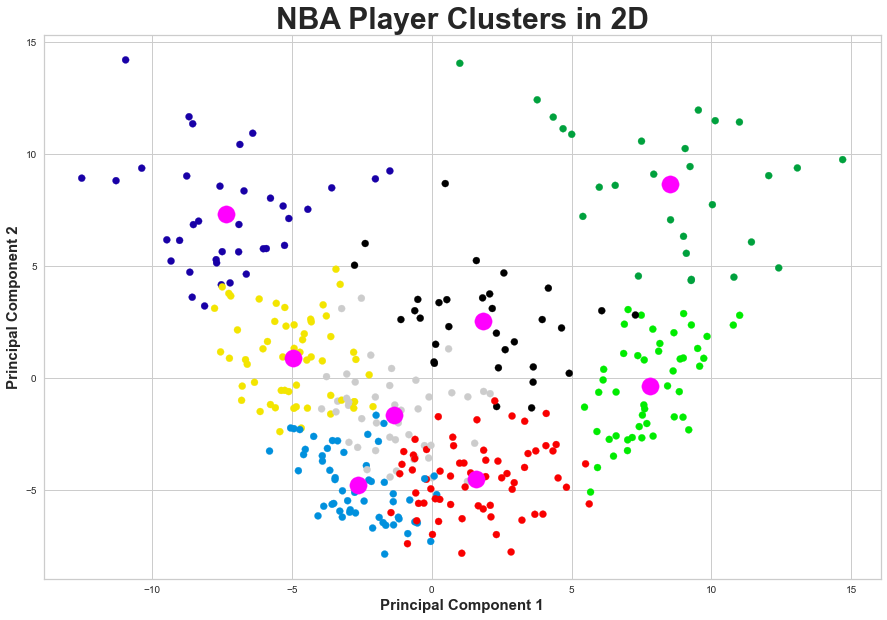

In [30]:
plt.figure(figsize=(15,10))
plt.scatter(x = components[:,0], y = components[:,1], c = labels, cmap = "nipy_spectral")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'magenta', label = 'Centroids')
plt.title('NBA Player Clusters in 2D', weight = 'bold', size = 30)
plt.xlabel('Principal Component 1', weight = 'bold', size = 15)
plt.ylabel('Principal Component 2', weight = 'bold', size = 15)
plt.show()

In [31]:
df_cluster = pd.DataFrame()
df_cluster['Player'] = for_later_df['players']
df_cluster['KM Cluster'] = y_kmeans
df_cluster['Postion'] = for_later_df['position']
df_cluster['Age'] =for_later_df['Age'] 
df_cluster['TeamAbbrv'] = for_later_df["teamAbbrv"]
#df_cluster.set_index('Player')

#Create Player column to join tables on
pca_df['Player'] = frame.index
#pca_df.set_index('Player', inplace=True)

new_df_cluster = pd.merge(
    left=df_cluster,
    right=pca_df,
    on='Player',
    how='left'
)

print(new_df_cluster.shape)

new_df_cluster = new_df_cluster[~new_df_cluster.index.duplicated(keep='first')]

print(new_df_cluster.shape)

display(new_df_cluster)

(370, 20)
(370, 20)


,Player,KM Cluster,Postion,Age,TeamAbbrv,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15
0,Langston Galloway,7,Guard,28.0,DET,-2.007707,-3.232789,5.539256,0.391044,1.072536,-0.210445,-0.830491,-0.016241,0.504305,0.004911,-0.142011,-1.306685,1.298510,-0.088158,-0.316691
1,Anfernee Simons,2,Guard,21.0,POR,-3.366921,-2.796708,-1.088375,1.187050,0.312893,-1.402378,0.707197,-0.086303,-0.301527,0.083611,-0.983913,0.500381,-1.847183,-1.439331,0.205505
2,Bobby Portis,0,Forward,25.0,NYK,3.631949,0.503035,0.374423,3.654580,-2.733515,-0.065150,0.439374,-0.066200,1.449816,-0.216571,-1.685262,0.203310,0.011969,-0.417636,0.328544
3,Coby White,5,Guard,20.0,CHI,-5.769687,-1.175579,-0.305385,-0.001429,-1.253227,-0.567211,-0.806315,0.165100,-1.116198,-0.449602,0.826311,-1.021105,0.029347,-1.340043,0.587804
4,Dorian Finney-Smith,7,Forward,27.0,DAL,1.855256,-0.591315,5.307778,-2.276526,1.137548,0.607263,-1.371232,1.353326,-0.036077,-1.049500,-0.171374,0.498523,-1.171875,0.251347,-0.600938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,Josh Jackson,6,Guard-Forward,23.0,MEM,-0.692653,-4.098668,-0.297481,-4.134039,-0.449544,0.312394,3.303327,-0.135598,0.014478,-0.040694,0.130039,0.568816,1.042003,-1.034255,0.895260
366,Victor Oladipo,5,Guard,28.0,IND,-6.339897,-0.183594,-1.455412,0.297937,-1.940926,0.487190,-0.637049,2.525437,-2.997123,1.496498,1.403052,-3.147265,-0.579729,1.004419,-0.466676
367,Jalen McDaniels,6,Forward-Center,22.0,CHA,2.093852,-5.678160,-1.443485,1.102229,-0.202775,1.035334,-2.033648,0.897662,2.295532,1.013863,3.816421,-1.630661,-0.814908,3.973344,3.639627
368,Andre Iguodala,6,Guard-Forward,36.0,MIA,2.691556,-4.257734,-1.072196,-0.669727,2.819448,1.768926,-2.417342,0.199361,1.777569,2.346333,2.727052,5.512968,-2.580749,2.061052,-3.093688


In [32]:
new_df_cluster[new_df_cluster['Player'] == "LeBron James"]

,Player,KM Cluster,Postion,Age,TeamAbbrv,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15
102,LeBron James,1,Forward,35.0,LAL,-6.402311,10.94127,-2.695084,-1.513497,0.926632,2.556973,2.206215,2.139469,1.048625,-0.858405,0.14365,2.320851,2.006912,1.225489,0.878902


In [33]:
pd.DataFrame.to_csv(new_df_cluster, "Player_Clusters_2019-20_Season.csv", index = True)

<br>

#  Interpreting Principal Components - Cont.

Now one more time before viewing our clusters, lets go ahead and display the top 5 players per each of the first 6 Principal Components

**A quick refresher**:

### PC 1 - Traditional Big Man / PNR Man

In [34]:
top15 = sort_top_eigens(Pca.components_[0], feat_list)
display(top15)

PickNRollHandler Poss        -0.159320
PickNRollMan percent Poss     0.159221
touches Avg_Drib_PerTouch    -0.153903
touches Avg_Sec_PerTouch     -0.150682
Advanced OREBpercent          0.149677
SCREEN_AST_PTS                0.148143
SCREEN_ASSISTS                0.147653
PickNRollHandler FGA         -0.146791
Defense BLKpercent            0.146408
Advanced REBpercent           0.144171
PickNRollMan FGM              0.144072
PickNRollHandler FGM         -0.143304
PickNRollMan Poss             0.142385
BOX_OUTS                      0.141934
PAINT_TOUCH_PTS               0.141903
dtype: float64

## The way to analyze the above table is as follows:

PC 1 seems to reward players who (positive marks):

- Are often a PickNRollMan 
- Have higher OREB percent
- Set good screens
- Get blocks often
- Score often as a PickNRollMan 
- Get a lot of rebounds
- Get a lot of points in the paint
- Box out often


PC 1 seems to penalize players who (negative marks):

- Are often PickNRollHandlers
- Take a lot of shots as PickNRollHandlers
- Who dribble a lot or for lot periods of time


High PC 1 values indicate that the player predominately plays close to the basket, is often a pick and roll man, sets good screens, and is a taller and or slower player less skilled with the ball in his hands. It’s safe to assume Centers or Forwards would have high PC 1 values.


<br>

In [35]:
#Show players with the top five scores in the component with corresponding absolute eigenvalues.
new_df_cluster.nlargest(5, 'PC 1')

,Player,KM Cluster,Postion,Age,TeamAbbrv,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15
87,Rudy Gobert,3,Center,28.0,UTA,14.696051,9.763401,-2.161123,-2.879507,2.107793,1.072179,-1.975260,0.293351,-2.630184,0.192321,2.781127,-1.516532,-0.422347,-1.509920,-0.082303
94,Hassan Whiteside,3,Center,31.0,POR,13.076349,9.391157,-1.388877,1.293213,-0.151559,0.758417,0.594870,-2.133182,-1.552578,0.411137,0.900835,-1.178953,-1.067713,-1.626280,-0.772398
62,Jarrett Allen,3,Center,22.0,BKN,12.409066,4.926544,-3.125258,-2.245852,2.409108,-0.043204,-1.768362,1.233967,-1.907921,0.628866,1.399743,-1.982184,-0.799774,-1.414225,0.553040
253,Clint Capela,3,Center,26.0,ATL,12.051868,9.048297,-0.657887,-4.597798,2.587761,0.248060,-1.678639,-1.025525,-1.656261,2.601592,3.920008,-2.767388,-0.028335,-1.197135,-3.142474
271,Richaun Holmes,3,Forward,26.0,SAC,11.434314,6.082761,-1.536490,-0.607452,2.177668,-0.724229,-1.023363,-2.929184,-0.682657,1.813463,0.647209,-1.951496,0.267950,-0.993949,-0.825764


### PC 2 - High Scorers / Close Range

In [36]:
top15 = sort_top_eigens(Pca.components_[1], feat_list)
display(top15)

POINTS                    0.182410
Scoring RA FGM            0.176619
Scoring RA FGA            0.176255
Advanced PIE              0.170501
DREB                      0.164903
Scoring ITP(NonRA) FGA    0.163188
Passing Passes Made       0.158624
OPP_PTS_PAINT             0.157430
OPP_PTS_FB                0.156325
Scoring ITP(NonRA) FGM    0.155199
OPP_PTS_OFF_TOV           0.153900
OPP_PTS_2ND_CHANCE        0.152295
Advanced USGpercent       0.151768
LOOSE_BALLS_RECOVERED     0.149527
Passing Passes Rec        0.146631
dtype: float64

In [37]:
new_df_cluster.nlargest(5, 'PC 2')

,Player,KM Cluster,Postion,Age,TeamAbbrv,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15
97,James Harden,1,Guard,30.0,HOU,-10.948414,14.216184,-4.174295,-3.052216,2.671397,3.643720,3.078255,8.819665,8.038281,-1.608220,0.704900,-0.664461,-0.198376,-4.291764,-0.854120
146,Giannis Antetokounmpo,3,Forward,25.0,MIL,1.003521,14.065913,-1.227075,-2.614788,-0.521739,4.245377,6.823204,1.319634,-0.557591,-1.605149,2.326953,1.790925,-0.379061,0.087884,0.797675
170,Anthony Davis,3,Forward-Center,27.0,LAL,3.771778,12.434413,2.796787,-0.239593,-3.521303,1.385892,2.121528,-0.946046,-0.469584,-0.474166,1.420023,0.593327,0.414087,0.324144,1.291662
92,Andre Drummond,3,Center,26.0,CLE,9.535661,11.975258,-2.678997,-4.097837,-4.542322,-1.647704,-0.917228,-1.057015,1.169727,-0.431576,2.666342,-0.017418,0.336721,-0.595114,0.877773
201,Russell Westbrook,1,Guard,31.0,HOU,-8.680291,11.678776,-2.345842,-1.702621,-1.748300,-0.178391,3.701461,4.063859,4.725744,0.759632,1.006445,0.529386,0.672117,-1.629024,-0.331793


### PC 3 Sharpshooter/3&D

In [38]:
top15 = sort_top_eigens(Pca.components_[2], feat_list)
display(top15)

Scoring CATCH_SHOOT_PTS      0.306531
Scoring Corner FGM           0.290087
Scoring Corner FGA           0.288659
spotupoffense Poss           0.270819
Scoring FGMpercentAST        0.207436
Scoring 3FGMpercentAST       0.186242
Scoring percentPTSPITP      -0.185478
touches Avg_Sec_PerTouch    -0.165894
CONTESTED_SHOTS_3PT          0.161180
touches Avg_Drib_PerTouch   -0.159243
spotupoffense PPP            0.150671
Scoring 2FGMpercentAST       0.145586
OPP_PTS_FB                   0.138604
OPP_PTS_OFF_TOV              0.131886
OPP_PTS_PAINT                0.131149
dtype: float64

In [39]:
new_df_cluster.nlargest(5, 'PC 3')

,Player,KM Cluster,Postion,Age,TeamAbbrv,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15
31,Duncan Robinson,7,Forward,26.0,MIA,-1.195754,-1.996906,8.842171,1.218860,5.804398,1.005293,-0.594540,0.000852,-0.936886,-0.104350,2.719982,1.215830,-0.458027,1.345873,-1.310429
45,P.J. Tucker,7,Forward,35.0,HOU,2.088369,-0.690439,7.210392,-2.404768,-1.271513,1.752055,-4.755428,2.503236,1.939327,0.929324,-0.102805,-1.379741,-0.211255,0.324019,-2.017043
142,Danuel House Jr.,7,Forward-Guard,27.0,HOU,-0.097350,-0.839128,6.190085,-2.770471,-0.262357,0.233296,-0.814911,0.669673,0.557690,-0.836235,0.469090,-0.624791,-0.622415,-1.773731,-1.051359
52,Bojan Bogdanovic,7,Forward,31.0,UTA,-3.222449,3.110508,5.687909,0.824910,1.697113,-0.422748,1.177779,2.290948,0.761306,-1.391525,0.604513,0.086526,-1.133066,-0.110645,0.782728
19,Ben McLemore,7,Guard,27.0,HOU,1.275853,-4.609606,5.660536,-0.118824,2.053223,0.689507,-1.498192,1.180579,1.809591,-0.002450,0.654971,1.547309,1.270959,-1.284615,1.368373


### PC 4 - Midrange Shooter

In [40]:
top15 = sort_top_eigens(Pca.components_[3], feat_list)
display(top15)

Defense STLpercent         -0.280914
STL                        -0.273683
DEFLECTIONS                -0.265482
Scoring percentPTSFBPs     -0.263798
Scoring percentPTS2PT_MR    0.239307
Scoring percentPTSOffTO    -0.235617
Scoring MR FGM              0.210708
Scoring MR FGA              0.193828
Scoring PullUpFGPCT         0.182803
LOOSE_BALLS_RECOVERED      -0.165121
Scoring ITP(NonRA) FGPCT    0.156689
Scoring percentPTSPITP     -0.148728
Scoring POST_TOUCH_PTS      0.143529
Scoring CATCH_SHOOT_PTS     0.140117
Postupoffense Poss          0.138973
dtype: float64

In [41]:
new_df_cluster.nlargest(5, 'PC 4')

,Player,KM Cluster,Postion,Age,TeamAbbrv,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15
120,LaMarcus Aldridge,3,Center-Forward,34.0,SAS,6.561890,8.612650,2.646730,7.043082,-5.033196,-0.347647,-0.900086,-2.224304,-0.035790,2.968804,-1.501696,1.519925,1.245205,-2.069238,2.089872
178,Kevin Love,0,Forward-Center,31.0,CLE,1.595811,5.254049,4.263052,5.218398,-2.202611,-0.480077,-1.222622,0.231597,1.551533,-0.398232,0.190673,1.602747,1.566992,-0.045485,-0.100016
243,Carmelo Anthony,0,Forward,36.0,POR,-0.498343,3.518794,2.306048,4.950313,-5.400340,-0.028169,1.265875,0.111117,2.844201,1.621787,-0.658362,0.651499,0.079605,-1.173935,-0.679752
246,Isaiah Thomas,5,Guard,31.0,WAS,-6.137738,-1.488202,-1.054730,4.557340,0.634322,-2.495481,-3.758564,-1.939148,-0.446116,-1.165713,0.604442,-0.102947,-0.164688,-1.670956,0.428940
212,Nikola Vucevic,3,Center,29.0,ORL,9.238105,9.452989,0.992290,4.266356,-4.354386,0.218686,-1.750506,-1.267252,-1.707580,0.074575,0.847650,0.802936,3.530726,1.041756,2.524872


### PC 5 - Slashers

In [42]:
top15 = sort_top_eigens(Pca.components_[4], feat_list)
display(top15)

EFF_FG_PCT                 0.340466
Advanced TSpercent         0.329118
Scoring RA FGPCT           0.242645
Postupoffense Poss        -0.237655
Scoring POST_TOUCH_PTS    -0.230483
Scoring ITPFGPCT           0.193741
Scoring 3FGMpercentAST    -0.187698
Cutting FG PCT             0.183349
Handoff PTS                0.176285
Cutting PPP                0.170752
Defense STLpercent        -0.169392
Handoff Poss               0.153905
STL                       -0.137143
spotupoffense Poss        -0.133832
Scoring CatchShootFGPCT    0.128925
dtype: float64

In [43]:
new_df_cluster.nlargest(5, 'PC 5')

,Player,KM Cluster,Postion,Age,TeamAbbrv,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15
31,Duncan Robinson,7,Forward,26.0,MIA,-1.195754,-1.996906,8.842171,1.218860,5.804398,1.005293,-0.594540,0.000852,-0.936886,-0.104350,2.719982,1.215830,-0.458027,1.345873,-1.310429
104,Mitchell Robinson,4,Center-Forward,22.0,NYK,11.012038,2.809075,-1.811055,-2.411571,5.020699,3.014388,-1.388051,-1.691512,0.277084,2.353463,0.539493,-1.627515,-1.752882,-2.963330,-0.857326
287,Daniel Gafford,4,Forward-Center,21.0,CHI,9.190774,-2.305563,-4.186971,-0.943196,4.583989,-0.549783,0.246679,2.090549,-0.113425,-0.295716,0.036090,-2.838731,-2.385066,0.201695,3.348374
93,Damian Jones,4,Center,25.0,ATL,8.986806,-1.741178,-1.469809,-0.055131,4.122485,-2.102515,-1.724208,-0.640255,1.655979,-1.527464,-1.438289,-0.194378,1.321031,-0.836618,1.862723
5,Doug McDermott,7,Forward,28.0,IND,-0.110818,-3.565735,4.195580,1.017363,4.119796,-0.025830,1.739537,-0.497318,-1.963052,0.311783,1.131274,0.698673,0.531034,0.830151,-0.266717


### PC 6 - 3&D

In [44]:
top15 = sort_top_eigens(Pca.components_[5], feat_list)
display(top15)

Defense <5ft OPPFGPCT      -0.344189
Defense WinShares           0.332035
Scoring CatchShootFGPCT     0.215985
Defense 20-24ft OPPFGPCT   -0.208563
EFF_FG_PCT                  0.185759
Advanced TSpercent          0.182435
Defense 10-14ft OPPFGPCT   -0.171844
Advanced PIE                0.164552
Cutting PPP                -0.159667
Cutting FG PCT             -0.151844
Defense 35-39ft OPPFGPCT   -0.146025
Scoring Corner FGPCT        0.144413
Defense 25-29ft OPPFGPCT   -0.142005
Handoff Poss               -0.138401
putbacksoffense PPP        -0.136795
dtype: float64

In [45]:
new_df_cluster.nlargest(5, 'PC 6')

,Player,KM Cluster,Postion,Age,TeamAbbrv,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15
336,David Nwaba,6,Guard-Forward,27.0,HOU,2.118118,-6.194333,-0.476762,-2.872349,-0.155420,5.643316,1.643346,0.014438,0.443606,1.494949,0.506013,-0.448678,-0.403616,-1.614401,3.049776
283,Marc Gasol,0,Center,35.0,TOR,4.916609,0.219148,1.203553,1.322852,-2.216980,4.579034,-1.775585,1.445432,-1.259624,0.362583,-1.608846,-0.148266,0.595818,1.268772,0.304661
146,Giannis Antetokounmpo,3,Forward,25.0,MIL,1.003521,14.065913,-1.227075,-2.614788,-0.521739,4.245377,6.823204,1.319634,-0.557591,-1.605149,2.326953,1.790925,-0.379061,0.087884,0.797675
220,Kyle Lowry,1,Guard,34.0,TOR,-6.632652,4.648977,-0.320976,-2.370639,-0.120162,3.721186,-2.412828,2.186583,-1.496806,-1.317251,-1.190636,-1.303603,1.398509,1.554609,-1.231916
353,Chris Chiozza,2,Guard,24.0,BKN,-3.288027,-5.936608,-3.199048,-1.003043,-3.468853,3.661784,1.377217,-0.982859,-0.034177,-1.558072,0.174440,-1.776562,1.949689,1.293999,2.071797


### PC 7 - Defensive / Transition Player

In [46]:
top15 = sort_top_eigens(Pca.components_[6], feat_list)
display(top15)

Passing Passes Made        -0.222000
Defense <5ft OPPFGPCT      -0.211315
Defense 10-14ft OPPFGPCT   -0.190529
OPP_PTS_PAINT              -0.175925
Scoring percentPTSFBPs      0.175207
Scoring percentPTSOffTO     0.162490
OPP_PTS_OFF_TOV            -0.162031
postupdefense Poss         -0.158491
Scoring percentPTSFT        0.153162
Handoff FG PCT              0.151460
Handoff PPP                 0.149403
TransitionOffensive PPP     0.148155
Passing Passes Rec         -0.146837
AST                        -0.143910
TransitionOffensive Poss    0.142792
dtype: float64

In [47]:
new_df_cluster.nlargest(5, 'PC 7')

,Player,KM Cluster,Postion,Age,TeamAbbrv,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15
146,Giannis Antetokounmpo,3,Forward,25.0,MIL,1.003521,14.065913,-1.227075,-2.614788,-0.521739,4.245377,6.823204,1.319634,-0.557591,-1.605149,2.326953,1.790925,-0.379061,0.087884,0.797675
360,Zion Williamson,3,Forward,19.0,NOP,5.991922,8.530861,-1.097278,-2.272947,-0.530388,-3.782855,4.978825,-0.846236,-2.212763,-2.349320,5.264689,0.086977,1.421985,0.205257,-0.027082
349,Garrison Mathews,2,Guard,23.0,WAS,-0.037327,-7.290411,0.478807,2.003942,1.311911,3.264929,4.625252,0.243775,0.494307,0.570701,0.799699,-3.889204,5.717323,-1.115483,-2.370859
257,Joel Embiid,3,Center-Forward,26.0,PHI,5.006028,10.893496,0.287625,4.238565,-5.794913,1.777907,3.983190,0.070021,0.062461,1.313267,1.139310,2.769579,1.012003,0.080144,1.271013
201,Russell Westbrook,1,Guard,31.0,HOU,-8.680291,11.678776,-2.345842,-1.702621,-1.748300,-0.178391,3.701461,4.063859,4.725744,0.759632,1.006445,0.529386,0.672117,-1.629024,-0.331793


### PC 8 - Iso / Inefficient Scorers

In [48]:
top15 = sort_top_eigens(Pca.components_[7], feat_list)
display(top15)

ISO Poss                    0.236592
ISO FG PCT                 -0.235594
ISO FGA                     0.232237
Scoring CatchShootFGPCT    -0.207947
ISO FGM                     0.206186
Defense STLpercent         -0.204433
Scoring percentPTS2PT_MR   -0.204023
ISO PPP                    -0.197377
Scoring percentPTSFT        0.189162
CHARGES_DRAWN               0.168908
EFF_FG_PCT                 -0.163546
Defense 20-24ft OPPFGPCT   -0.156873
PickNRollHandler FG PCT    -0.153893
spotupoffense PPP          -0.153692
Scoring ITPFGPCT           -0.151811
dtype: float64

In [49]:
new_df_cluster.nlargest(5, 'PC 8')

,Player,KM Cluster,Postion,Age,TeamAbbrv,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15
97,James Harden,1,Guard,30.0,HOU,-10.948414,14.216184,-4.174295,-3.052216,2.671397,3.643720,3.078255,8.819665,8.038281,-1.608220,0.704900,-0.664461,-0.198376,-4.291764,-0.854120
345,Blake Griffin,0,Forward,31.0,DET,-1.102227,2.620170,-1.346422,0.717551,-2.690756,-1.416362,0.150509,4.317835,-0.619250,-2.374143,1.047176,0.338401,0.632515,-1.230084,-1.573763
201,Russell Westbrook,1,Guard,31.0,HOU,-8.680291,11.678776,-2.345842,-1.702621,-1.748300,-0.178391,3.701461,4.063859,4.725744,0.759632,1.006445,0.529386,0.672117,-1.629024,-0.331793
344,Al-Farouq Aminu,6,Forward,29.0,ORL,1.390858,-4.228154,-1.587935,-3.227262,-4.785665,-0.621301,-0.682823,3.915432,-2.303688,0.968668,-0.334483,0.092872,0.271707,1.708605,0.742861
67,Spencer Dinwiddie,1,Guard,27.0,BKN,-7.710783,5.296041,-3.392600,-0.685328,2.020327,0.554712,-0.963059,3.228797,-0.930777,-1.452122,-1.056794,0.699110,-0.597269,-1.140646,0.504040


<br>

# Analyzing The Clusters

In [50]:
avg_cluster = new_df_cluster.copy()
avg_cluster.drop('Age', axis=1, inplace=True)
avg_cluster = avg_cluster.groupby('KM Cluster').mean()
avg_cluster

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15
KM Cluster,,,,,,,,,,,,,,,
0,1.847729,2.562389,1.981388,0.869985,-1.468487,-0.446919,0.439511,0.118325,0.601904,-0.777106,-0.485477,0.278809,-0.546583,0.091263,-0.264803
1,-7.343027,7.325372,-1.439624,0.002934,1.163415,0.139115,0.077142,1.055498,0.463261,0.512615,-0.446678,-0.089323,0.263986,0.120519,0.250272
2,-2.623014,-4.762005,-1.724330,0.873992,-0.832578,0.269229,0.542858,-0.569844,-0.289885,-0.395040,0.539109,-0.368669,0.128730,-0.401454,-0.103560
3,8.511518,8.667921,-0.338739,0.475538,-1.307310,0.121687,0.026064,-0.781817,-1.104286,-0.154287,1.214569,0.161766,0.399785,-0.381630,-0.123337
4,7.812961,-0.342958,-1.819700,0.319248,1.528956,0.003601,-0.125634,0.297876,0.412557,0.195003,-0.699740,-0.369983,-0.016232,0.077120,0.307780
5,-4.977061,0.885548,-0.259761,-0.213526,0.002597,0.031703,-0.690792,-0.730956,-0.527714,0.171681,-0.159615,-0.014240,-0.305279,0.087556,-0.101626
6,1.588708,-4.483959,0.237457,-0.691358,-0.135520,-0.108047,0.095091,0.655306,0.319605,0.104041,-0.013975,0.587856,0.157035,0.384730,0.093574
7,-1.359182,-1.639404,3.893147,-1.059968,0.553043,-0.084086,-0.189088,-0.072948,0.012891,0.157276,0.247906,-0.212506,-0.040680,-0.174221,-0.128747


In [51]:
avg_cluster.to_csv('avg_pca.csv', index=True)

<AxesSubplot:ylabel='KM Cluster'>

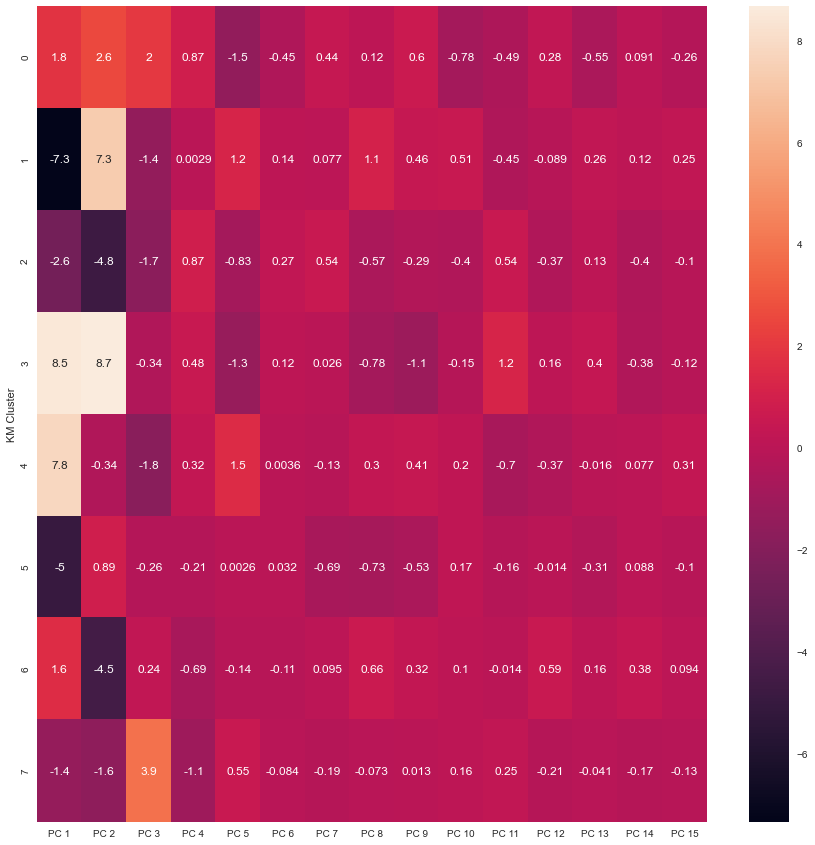

In [52]:
plt.figure(figsize=(15,15))
sns.heatmap(avg_cluster, annot=True)

<br>

## Cluster 1 - The 2-Way In-Out Big Man 

Cluster 1 has high PC1, PC2 and PC3, and negative PC5. This means players in Cluster 1 play mostly within 6 feet from the basket, are efficient and score a lot, and can stretch the floor and shoot from mid-range or the 3 also. These players typically also offer some value in the form of BLKs and defense. Notable players in this Cluster:

In [53]:
new_df_cluster[new_df_cluster['KM Cluster'] == 0].head(15)

,Player,KM Cluster,Postion,Age,TeamAbbrv,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15
2,Bobby Portis,0,Forward,25.0,NYK,3.631949,0.503035,0.374423,3.654580,-2.733515,-0.065150,0.439374,-0.066200,1.449816,-0.216571,-1.685262,0.203310,0.011969,-0.417636,0.328544
15,Tobias Harris,0,Forward,27.0,PHI,-2.380428,6.017307,2.559580,2.193290,0.111805,-0.618778,2.104108,0.535233,0.022904,0.246722,0.100913,0.644033,-0.538153,1.576075,-0.324715
34,Harrison Barnes,0,Forward,28.0,SAC,-0.411936,2.681924,2.845236,0.559252,-0.815423,-1.942905,0.238571,1.008469,0.710807,-2.406717,0.588335,0.464207,-0.458154,0.807127,-1.550030
36,Jerami Grant,0,Forward,26.0,DEN,2.384565,0.464301,3.476615,0.274006,0.663282,-1.330496,0.726874,-0.118937,0.026162,-1.502332,-0.522633,0.391091,-0.817125,-0.380211,-0.180234
42,Miles Bridges,0,Forward,22.0,CHA,0.139188,1.513618,3.313949,-0.427812,-1.333553,-2.249645,-0.209866,1.200992,1.079234,-2.025913,0.588732,0.177039,-1.907256,0.216193,-0.076032
44,Nemanja Bjelica,0,Forward,32.0,SAC,2.312687,2.010981,2.946743,0.272423,-0.665809,0.856465,-1.965003,-0.837858,1.957584,-1.696706,-1.405042,0.584294,-0.794327,0.641168,-0.454454
64,Julius Randle,0,Forward-Center,25.0,NYK,0.483257,8.694013,0.659609,1.132239,-2.551174,-2.397829,2.133882,1.118835,0.653105,-1.029972,0.781430,2.204195,-0.101880,0.735824,-1.584179
72,Brook Lopez,0,Center,32.0,MIL,6.080306,3.014630,3.436567,1.108984,-1.923570,2.882122,0.038575,1.262242,-2.384618,0.100279,-1.125567,-0.421761,-5.071290,-0.429191,0.842823
80,Jaren Jackson Jr.,0,Forward-Center,20.0,MEM,2.579860,4.699631,5.139872,0.583319,-0.197946,-0.343548,0.543756,-0.124857,-0.513066,-2.496616,0.424724,-0.603197,-2.780874,-0.561774,0.379861
105,Rudy Gay,0,Forward-Guard,33.0,SAS,0.094897,0.662744,0.989197,2.275965,-0.669140,-0.276736,2.482797,-0.652542,1.050735,0.381128,-1.389807,0.184348,-1.592352,-0.073628,-0.249337


## Cluster 2 - Elite All Stars

Cluster 2 has the 2nd highest PC2 value and lowest PC1 value. Players in Cluster 2 likely score the most amounts of points each game for their team. They handle the ball very often and typically can score from range and have high usage rates. Some notable players in this Cluster are:

In [54]:
new_df_cluster[new_df_cluster['KM Cluster'] == 1].head(15)

,Player,KM Cluster,Postion,Age,TeamAbbrv,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15
13,Shai Gilgeous-Alexander,1,Guard-Forward,21.0,OKC,-5.915378,5.790582,-1.140164,-0.796866,0.675501,-0.384950,0.066985,0.945880,0.713218,0.300993,-0.442486,-1.089407,-1.973679,0.446571,1.260584
17,Zach LaVine,1,Guard-Forward,25.0,CHI,-6.896001,6.864861,1.199514,-1.965027,2.665637,-1.995724,0.247699,1.466191,0.212106,0.705034,1.464376,-0.330369,0.687069,-1.991794,1.386874
24,Chris Paul,1,Guard,35.0,OKC,-9.324186,5.233618,-4.294778,2.002318,-0.193802,3.159630,-1.108300,-1.521859,2.807451,2.419189,-1.332723,-1.120725,1.046053,0.194920,-0.682386
25,Collin Sexton,1,Guard,21.0,CLE,-6.906876,5.643359,-0.490299,0.197009,1.370272,-3.688091,-1.315775,-0.622006,0.375477,-0.340395,-0.017069,-0.765439,0.606444,-0.384291,-0.695506
27,Damian Lillard,1,Guard,29.0,POR,-11.291104,8.823295,-3.975104,0.577891,3.487636,1.346650,-0.891885,2.712431,1.323144,-0.052600,-0.493386,-0.606001,1.185376,-2.112793,-1.129472
29,Devonte' Graham,1,Guard,25.0,CHA,-8.567070,3.617695,-1.274125,-0.498209,0.656821,0.224984,-3.939369,1.337178,-1.549483,0.113753,-1.674576,0.422072,1.575245,0.044578,0.059330
51,Ben Simmons,1,Guard-Forward,23.0,PHI,-1.497212,9.257270,-2.268480,-6.654634,-1.021053,1.308668,-0.210044,-2.857473,0.456658,-2.189970,0.263436,1.751643,2.544838,1.459018,0.033779
59,Donovan Mitchell,1,Guard,23.0,UTA,-8.338731,7.015380,-0.529803,2.248121,2.611610,-0.374885,-0.748590,0.581423,-0.696788,1.587640,-1.451639,-0.332285,-1.446707,0.918942,2.122941
67,Spencer Dinwiddie,1,Guard,27.0,BKN,-7.710783,5.296041,-3.392600,-0.685328,2.020327,0.554712,-0.963059,3.228797,-0.930777,-1.452122,-1.056794,0.699110,-0.597269,-1.140646,0.504040
73,CJ McCollum,1,Guard,28.0,POR,-9.018358,6.155080,1.149478,2.240303,0.615705,-0.043617,-0.565700,0.419149,0.222716,2.521684,-0.054897,-1.069800,-0.890570,-1.528530,-0.062984


## Cluster 3 — 6th Man

Cluster 3 has negative PC1, PC2, and PC3. Players in this Cluster are more inefficient and score far less. rebounds. These players typically play within the mid-range but away from the basket. However, these players likely will bolster the perimeter defense and will often score off transition. Some notable players in this Cluster:

In [55]:
new_df_cluster[new_df_cluster['KM Cluster'] == 2].head(15)

,Player,KM Cluster,Postion,Age,TeamAbbrv,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15
1,Anfernee Simons,2,Guard,21.0,POR,-3.366921,-2.796708,-1.088375,1.187050,0.312893,-1.402378,0.707197,-0.086303,-0.301527,0.083611,-0.983913,0.500381,-1.847183,-1.439331,0.205505
7,Jalen Brunson,2,Guard,23.0,DAL,-4.928236,-2.253001,-2.701051,2.206445,0.325707,2.020480,0.058979,-1.259086,-1.420254,-0.833758,-0.194069,-0.865455,-0.524196,0.183024,-0.398128
21,Bryn Forbes,2,Guard,26.0,SAS,-3.645181,-4.114100,2.430437,2.722402,-0.099474,-0.958439,-0.418209,-0.720577,-0.081058,0.814255,1.235238,-2.844704,2.022683,-1.323848,-1.005974
39,Kevin Knox II,2,Forward,20.0,NYK,-0.787121,-5.440777,-0.033928,0.795836,-1.073631,-1.587938,1.142891,1.288959,-1.068700,0.783768,0.102082,-0.438830,-0.054961,-1.067762,0.182247
46,Patty Mills,2,Guard,31.0,SAS,-3.914637,-3.463786,1.749033,1.918538,1.191559,1.518823,0.367130,-1.396411,-0.123874,-0.669136,0.340688,-2.529436,1.343610,-1.326481,-0.244032
53,Brad Wanamaker,2,Guard,30.0,BOS,-3.143230,-3.314824,-1.448120,-2.394011,0.415407,1.392873,0.936117,-1.367462,-1.174410,-0.219654,-1.407165,1.483019,1.995434,0.348863,0.734869
85,Malik Monk,2,Guard,22.0,CHA,-1.711592,-2.020453,-0.561673,0.196672,0.661337,-1.627720,0.497840,0.243450,0.433614,-1.422780,-0.152835,-1.218146,-0.326677,1.252846,1.020550
112,Austin Rivers,2,Guard,27.0,HOU,-3.732123,-3.135533,-0.208149,0.014371,-0.027526,0.442801,-0.401950,0.540816,1.376101,-2.267447,1.180362,0.806527,-0.748875,-2.861556,-1.602728
134,Frank Ntilikina,2,Guard,21.0,NYK,-4.522309,-3.178395,-2.394725,0.503439,-2.156656,0.809430,-1.949202,-1.984946,-0.226139,0.622881,-0.646422,0.593241,-0.827487,-1.631859,-0.411627
139,Vince Carter,2,Guard-Forward,43.0,ATL,0.176506,-5.198491,-0.154303,3.569035,-2.505531,-0.328176,0.308545,0.174765,0.042340,-1.111704,-0.680496,-1.139418,-2.974878,-0.021930,-0.100060


## Cluster 4  — Paint Beasts

Cluster 4 has high PC1, PC2 and negative PC3 and PC4 values. This means players in Cluster 4 play mostly within 6 feet from the basket, are very efficient from close range and can score a lot, grab a lot of rebounds and bolster the inside defense. Notable players in this Cluster:

In [56]:
new_df_cluster[new_df_cluster['KM Cluster'] == 3].head(15)

,Player,KM Cluster,Postion,Age,TeamAbbrv,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15
12,Nikola Jokic,3,Center,25.0,DEN,4.345035,11.660861,-0.486101,3.269719,-4.067080,1.807258,-1.460407,-2.469938,0.791263,-0.452139,0.400457,3.730450,1.888879,2.840664,-0.438411
18,Bam Adebayo,3,Center-Forward,22.0,MIA,7.502854,10.586886,-1.837288,-1.556505,-0.838634,0.546072,-1.046424,-2.126877,-1.551216,-1.258028,1.850474,0.825098,0.763691,1.319453,-2.587634
43,Montrezl Harrell,3,Forward-Center,26.0,LAC,7.938970,9.112366,-2.337129,-0.818039,-0.559918,-0.026210,1.802242,1.813202,-2.003068,-3.315241,0.753166,-0.840779,-1.752145,-0.138469,-2.694255
62,Jarrett Allen,3,Center,22.0,BKN,12.409066,4.926544,-3.125258,-2.245852,2.409108,-0.043204,-1.768362,1.233967,-1.907921,0.628866,1.399743,-1.982184,-0.799774,-1.414225,0.553040
78,Domantas Sabonis,3,Forward-Center,24.0,IND,10.138986,11.502650,-0.850168,1.936584,-3.260317,0.804201,-1.976283,-0.947916,-3.813215,-0.844501,1.280204,2.350822,2.757308,0.712307,-0.577151
87,Rudy Gobert,3,Center,28.0,UTA,14.696051,9.763401,-2.161123,-2.879507,2.107793,1.072179,-1.975260,0.293351,-2.630184,0.192321,2.781127,-1.516532,-0.422347,-1.509920,-0.082303
92,Andre Drummond,3,Center,26.0,CLE,9.535661,11.975258,-2.678997,-4.097837,-4.542322,-1.647704,-0.917228,-1.057015,1.169727,-0.431576,2.666342,-0.017418,0.336721,-0.595114,0.877773
94,Hassan Whiteside,3,Center,31.0,POR,13.076349,9.391157,-1.388877,1.293213,-0.151559,0.758417,0.594870,-2.133182,-1.552578,0.411137,0.900835,-1.178953,-1.067713,-1.626280,-0.772398
98,Jonas Valanciunas,3,Center,28.0,MEM,10.037580,7.751833,-1.036699,2.385102,-1.364827,1.276543,0.858068,-1.589035,-0.387111,-1.102811,0.244845,0.287542,-0.583998,0.478820,-0.044562
120,LaMarcus Aldridge,3,Center-Forward,34.0,SAS,6.561890,8.612650,2.646730,7.043082,-5.033196,-0.347647,-0.900086,-2.224304,-0.035790,2.968804,-1.501696,1.519925,1.245205,-2.069238,2.089872


## Cluster 5 - Glass Cleaners/Traditional Centers

Cluster 5 has high PC1, PC5 and negative PC2 and PC3 values. This means players in Cluster 4 play mostly within 6 feet from the basket, and eat off of handoffs inside or assisted off the pick and roll. Although players in this Cluster don't score a lot, they grab a lot of rebounds and can bolster the inside defense.  Notable players in this Cluster:

In [57]:
new_df_cluster[new_df_cluster['KM Cluster'] == 4].head(15)

,Player,KM Cluster,Postion,Age,TeamAbbrv,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15
6,Ivica Zubac,4,Center,23.0,LAC,9.846732,1.865677,-2.536562,1.232033,2.284033,1.570188,1.953629,-0.521716,-1.142049,1.758711,-0.849903,-1.427676,-0.722453,-1.491257,-1.492060
35,Jakob Poeltl,4,Center,24.0,SAS,8.884401,0.857746,-2.744189,1.134852,2.264782,1.620331,0.335696,-1.518684,0.202560,1.880633,-2.156349,-2.302191,-1.739229,-0.065999,-1.762741
41,Maxi Kleber,4,Forward,28.0,DAL,6.592445,-0.617806,4.024690,0.837822,1.184369,1.484640,-2.507634,1.949816,-0.535250,-0.960953,-1.288908,-0.728161,0.020301,-1.729110,1.645831
54,Christian Wood,4,Forward,24.0,DET,6.889874,2.412296,0.443837,0.706473,1.143200,1.101431,0.840067,-0.173084,1.301302,-1.513492,-0.493966,-0.062334,0.232935,-0.396075,2.097060
60,Dwight Howard,4,Center-Forward,34.0,LAL,9.580506,0.534595,-2.164779,-0.945680,4.117608,0.835932,0.910413,-1.055795,1.595734,0.230322,0.674978,0.294791,1.215277,1.543324,0.219688
82,Jaxson Hayes,4,Center-Forward,20.0,NOP,8.853886,-0.600497,-1.311911,-1.544837,3.883827,0.876236,0.020195,0.423068,-0.615472,-1.501857,-1.332875,0.412572,3.156816,-1.269347,0.847787
89,Taj Gibson,4,Forward,35.0,NYK,7.585552,-1.193530,-1.507995,2.207586,0.786009,-1.174651,-0.124173,-0.822336,1.482103,1.590231,-1.560698,0.431954,-0.097197,0.167812,0.285039
93,Damian Jones,4,Center,25.0,ATL,8.986806,-1.741178,-1.469809,-0.055131,4.122485,-2.102515,-1.724208,-0.640255,1.655979,-1.527464,-1.438289,-0.194378,1.321031,-0.836618,1.862723
95,JaVale McGee,4,Center-Forward,32.0,LAL,8.632639,0.324201,-1.822274,-1.021480,3.219860,1.182102,2.180042,-2.214141,0.511280,0.559050,-1.162291,-0.733706,-1.626612,-0.925781,-0.420515
104,Mitchell Robinson,4,Center-Forward,22.0,NYK,11.012038,2.809075,-1.811055,-2.411571,5.020699,3.014388,-1.388051,-1.691512,0.277084,2.353463,0.539493,-1.627515,-1.752882,-2.963330,-0.857326


## Cluster 6 - Shooters / Shot Creators

Cluster 6 has very negative PC1, slightly negative PC3 and PC4, and positive PC2. Players in this Cluster predominately play within the 3pt line. Positive PC 2 may indicate that players in this Cluster may score a good amount but aren't as efficient as all-stars or don't bolster the team much in terms of defense. Some notable players in this Cluster:

In [58]:
new_df_cluster[new_df_cluster['KM Cluster'] == 5].head(15)

,Player,KM Cluster,Postion,Age,TeamAbbrv,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15
3,Coby White,5,Guard,20.0,CHI,-5.769687,-1.175579,-0.305385,-0.001429,-1.253227,-0.567211,-0.806315,0.165100,-1.116198,-0.449602,0.826311,-1.021105,0.029347,-1.340043,0.587804
11,Monte Morris,5,Guard,25.0,DEN,-4.931584,-1.346607,-1.009158,0.421560,1.098549,0.133276,0.025790,-2.489884,-1.413190,0.512421,-2.104637,1.459202,-0.056074,-0.674866,-0.705527
16,Tomas Satoransky,5,Guard,28.0,CHI,-4.714855,1.158834,-0.808717,-2.322985,-0.894875,-0.302638,-1.725252,-0.771731,0.134602,-1.183322,-1.255044,-0.898958,1.070614,0.892690,-0.693848
20,Bruce Brown,5,Guard-Forward,23.0,DET,-2.712970,0.837440,-1.130259,-3.513539,-1.106277,-0.803547,-1.690028,-0.492318,-0.802471,-1.385456,0.056007,0.390238,-0.726812,0.629949,0.588817
22,Buddy Hield,5,Guard,27.0,SAC,-5.211818,2.325190,3.238095,1.054166,0.751964,-0.411631,-0.608568,0.095325,0.968353,0.569162,0.951645,-0.776182,0.058414,-0.532825,0.208485
26,Cory Joseph,5,Guard,28.0,SAC,-3.616239,-1.600869,-1.465067,-0.341691,-0.452166,-0.671216,-1.566555,-0.920809,-0.757119,-0.073644,-2.339714,1.614770,-0.500072,1.918271,-0.524184
28,Dennis Schroder,5,Guard,26.0,OKC,-7.257391,3.787342,0.835925,1.072702,1.604868,1.764215,0.515663,0.376285,-2.075419,1.280943,-0.736065,1.333791,-0.178780,0.044266,0.988542
30,Dillon Brooks,5,Guard-Forward,24.0,MEM,-4.619556,1.719048,2.449496,0.992000,-0.147504,-2.242095,0.448007,-0.379276,-1.545691,1.799762,0.185121,-1.758714,-1.022261,1.332023,0.182531
32,Evan Fournier,5,Guard-Forward,27.0,ORL,-5.875119,1.639755,1.992254,0.850874,2.175058,-1.074363,0.091187,-1.303596,-0.301120,0.931868,0.075922,-1.208384,0.555715,0.567949,1.174208
37,Joe Ingles,5,Forward-Guard,32.0,UTA,-5.116105,-0.597101,-0.088783,-1.037855,0.779334,3.036486,-2.815922,-1.412187,-0.721638,-0.800529,1.449866,0.212223,-0.565351,-0.730520,0.417028


## Cluster 7 - Role Players 

Cluster 7 have pretty low values among all Principal Components. Players in this cluster are not elite in any specific category. They have among the lowest average PC2 value, indicating that they score less and are not very efficient with the ball in their hands. Notable players in this Cluster:


In [59]:
new_df_cluster[new_df_cluster['KM Cluster'] == 6].head(15)

,Player,KM Cluster,Postion,Age,TeamAbbrv,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15
10,Mike Scott,6,Forward,31.0,PHI,2.949966,-4.666391,1.055483,1.831940,-0.036320,0.097183,0.214225,1.055324,0.965946,-0.110753,-0.585819,0.342490,1.130529,2.173031,-1.036933
14,Terence Davis,6,Guard,23.0,TOR,-1.000756,-3.276455,-0.054569,-1.210300,1.010086,1.664703,2.920519,-0.988718,0.620364,-1.385114,0.811617,1.847335,-0.892082,0.871470,0.501722
23,Cedi Osman,6,Forward,25.0,CLE,-0.655783,-3.433078,-0.345083,-0.210489,-1.593100,-0.460541,-4.461399,1.712988,2.144386,0.922328,3.686698,-0.680476,1.065276,1.561173,-0.852775
48,Thaddeus Young,6,Forward,32.0,CHI,0.751404,-2.634630,-0.814330,-2.253094,-3.367117,0.542487,-3.589191,1.403432,2.140703,1.882903,3.887092,-0.689083,-0.082868,2.344068,0.386638
49,Trey Lyles,6,Forward,24.0,SAS,4.083671,-3.011862,1.278814,1.209861,-0.358108,-0.594199,-1.017064,0.656160,2.237718,0.588344,-1.459923,-0.566034,0.502990,0.380563,0.263422
55,Darius Bazley,6,Forward-Guard,20.0,OKC,2.366618,-3.703082,1.060554,-0.628327,-1.094820,0.567847,1.460389,2.156155,-0.818195,0.350186,-1.287308,0.735180,-1.665975,-0.854367,0.146393
79,Grant Williams,6,Forward,21.0,BOS,4.518170,-4.455383,-0.796121,0.157331,-0.507941,0.089811,0.467156,2.204383,0.154364,0.414769,-2.252891,0.594522,-0.110844,1.740576,-0.806693
90,Thon Maker,6,Forward-Center,23.0,DET,3.976563,-6.071751,-3.621302,1.422981,-0.385739,-0.077690,-0.851012,1.360881,2.021585,0.820677,2.063771,-0.984845,0.267921,1.359798,0.606908
96,James Ennis III,6,Forward,29.0,ORL,0.671002,-4.371634,0.937911,-1.310809,1.091648,-2.311203,1.590783,-0.081852,0.161790,0.091604,-0.168218,0.428604,0.634709,0.599987,0.119955
103,Maurice Harkless,6,Forward-Guard,27.0,NYK,1.856022,-3.216730,1.019109,-2.764595,0.076997,-0.080489,0.185393,-0.530153,1.127028,0.497615,-0.485507,1.226744,0.150512,0.435853,-1.992038


## Cluster 8 - Elite 3PT Shooters 

Cluster 8 has the highest average PC3 value, and negative PC1 and PC2 values. Players in Cluster 8 play around the perimeter and are highly efficient 3pt shooters. They typically don't play near the basket, and may bolster the perimeter defense. Some notable players in this Cluster:

In [60]:
new_df_cluster[new_df_cluster['KM Cluster'] == 7].head(15)

,Player,KM Cluster,Postion,Age,TeamAbbrv,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15
0,Langston Galloway,7,Guard,28.0,DET,-2.007707,-3.232789,5.539256,0.391044,1.072536,-0.210445,-0.830491,-0.016241,0.504305,0.004911,-0.142011,-1.306685,1.298510,-0.088158,-0.316691
4,Dorian Finney-Smith,7,Forward,27.0,DAL,1.855256,-0.591315,5.307778,-2.276526,1.137548,0.607263,-1.371232,1.353326,-0.036077,-1.049500,-0.171374,0.498523,-1.171875,0.251347,-0.600938
5,Doug McDermott,7,Forward,28.0,IND,-0.110818,-3.565735,4.195580,1.017363,4.119796,-0.025830,1.739537,-0.497318,-1.963052,0.311783,1.131274,0.698673,0.531034,0.830151,-0.266717
8,Justin Holiday,7,Forward-Guard,31.0,IND,-0.599670,-3.506444,4.804540,-2.877542,-0.383281,1.125197,0.335153,-0.018272,-0.722112,1.367774,0.151058,-0.398901,0.600469,-0.378053,-0.217904
9,Mikal Bridges,7,Forward,23.0,PHX,1.290970,-0.832098,3.367882,-4.582959,1.350576,0.053071,0.327416,-1.684253,0.663218,0.963553,-1.217346,0.786324,0.355536,0.089820,-0.616644
19,Ben McLemore,7,Guard,27.0,HOU,1.275853,-4.609606,5.660536,-0.118824,2.053223,0.689507,-1.498192,1.180579,1.809591,-0.002450,0.654971,1.547309,1.270959,-1.284615,1.368373
31,Duncan Robinson,7,Forward,26.0,MIA,-1.195754,-1.996906,8.842171,1.218860,5.804398,1.005293,-0.594540,0.000852,-0.936886,-0.104350,2.719982,1.215830,-0.458027,1.345873,-1.310429
33,Furkan Korkmaz,7,Guard-Forward,22.0,PHI,-0.636441,-3.628201,3.843945,0.786367,1.546172,0.734417,0.965433,0.347489,-0.724890,-0.110569,-0.868069,-0.252318,0.498640,0.369176,0.300573
38,Kent Bazemore,7,Guard-Forward,30.0,SAC,-1.977035,-1.997875,2.168689,-3.172385,-2.138011,0.086469,0.466499,0.681169,-1.312661,0.879140,-0.731663,-0.724077,-1.561012,-0.280247,0.404166
45,P.J. Tucker,7,Forward,35.0,HOU,2.088369,-0.690439,7.210392,-2.404768,-1.271513,1.752055,-4.755428,2.503236,1.939327,0.929324,-0.102805,-1.379741,-0.211255,0.324019,-2.017043


<br>

## Notable Players with Clusters

In [61]:
new_df_cluster[new_df_cluster.Player == "LeBron James"]

,Player,KM Cluster,Postion,Age,TeamAbbrv,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15
102,LeBron James,1,Forward,35.0,LAL,-6.402311,10.94127,-2.695084,-1.513497,0.926632,2.556973,2.206215,2.139469,1.048625,-0.858405,0.14365,2.320851,2.006912,1.225489,0.878902


In [62]:
new_df_cluster[new_df_cluster.Player == "Joel Embiid"]

,Player,KM Cluster,Postion,Age,TeamAbbrv,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15
257,Joel Embiid,3,Center-Forward,26.0,PHI,5.006028,10.893496,0.287625,4.238565,-5.794913,1.777907,3.98319,0.070021,0.062461,1.313267,1.13931,2.769579,1.012003,0.080144,1.271013


In [63]:
new_df_cluster[new_df_cluster.Player == "Luka Doncic"]

,Player,KM Cluster,Postion,Age,TeamAbbrv,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15
209,Luka Doncic,1,Forward-Guard,21.0,DAL,-8.54906,11.363448,-5.427318,-0.344898,3.405822,-0.175589,0.276549,2.618682,0.814741,-1.223586,-0.517168,1.36459,-0.101002,1.289984,0.692634


In [64]:
new_df_cluster[new_df_cluster.Player == "James Harden"]

,Player,KM Cluster,Postion,Age,TeamAbbrv,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15
97,James Harden,1,Guard,30.0,HOU,-10.948414,14.216184,-4.174295,-3.052216,2.671397,3.64372,3.078255,8.819665,8.038281,-1.60822,0.7049,-0.664461,-0.198376,-4.291764,-0.85412


In [65]:
new_df_cluster[new_df_cluster.Player == "Giannis Antetokounmpo"]

,Player,KM Cluster,Postion,Age,TeamAbbrv,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15
146,Giannis Antetokounmpo,3,Forward,25.0,MIL,1.003521,14.065913,-1.227075,-2.614788,-0.521739,4.245377,6.823204,1.319634,-0.557591,-1.605149,2.326953,1.790925,-0.379061,0.087884,0.797675


In [66]:
new_df_cluster[new_df_cluster.Player == "Anthony Davis"]

,Player,KM Cluster,Postion,Age,TeamAbbrv,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15
170,Anthony Davis,3,Forward-Center,27.0,LAL,3.771778,12.434413,2.796787,-0.239593,-3.521303,1.385892,2.121528,-0.946046,-0.469584,-0.474166,1.420023,0.593327,0.414087,0.324144,1.291662
